# DATA ANALYSIS

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df= pd.read_csv('data/house_price_prediction/train.csv')

In [3]:
pd.set_option('display.max_columns', None)  # Show all columns in the DataFrame

In [4]:
df.shape

(1460, 81)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### All analysis
In data analysis, we will analyze to find out the below stuff

1) Missing Values and the relationship of it with the target value.
2) All the numerical Variables
3) Distribution of the numerical variables
4) Categorical Variables
5) Cardinality of Categorical Variables
6) Outliers
7) Relationships between independent and dependent features

### Missing Values

In [21]:
import numpy as np

In [22]:
# percentage of missing values in each column
features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0]
for feature in features_with_nan:
    print(feature, np.round(df[feature].isnull().mean(),4)*100, '% missing values')

LotFrontage 17.740000000000002 % missing values
Alley 93.77 % missing values
MasVnrType 59.730000000000004 % missing values
MasVnrArea 0.5499999999999999 % missing values
BsmtQual 2.53 % missing values
BsmtCond 2.53 % missing values
BsmtExposure 2.6 % missing values
BsmtFinType1 2.53 % missing values
BsmtFinType2 2.6 % missing values
Electrical 0.06999999999999999 % missing values
FireplaceQu 47.260000000000005 % missing values
GarageType 5.55 % missing values
GarageYrBlt 5.55 % missing values
GarageFinish 5.55 % missing values
GarageQual 5.55 % missing values
GarageCond 5.55 % missing values
PoolQC 99.52 % missing values
Fence 80.75 % missing values
MiscFeature 96.3 % missing values


#### Relationship between the missing values and the sales price

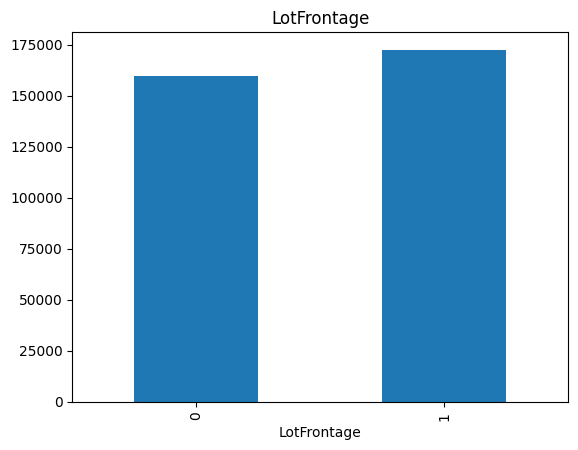

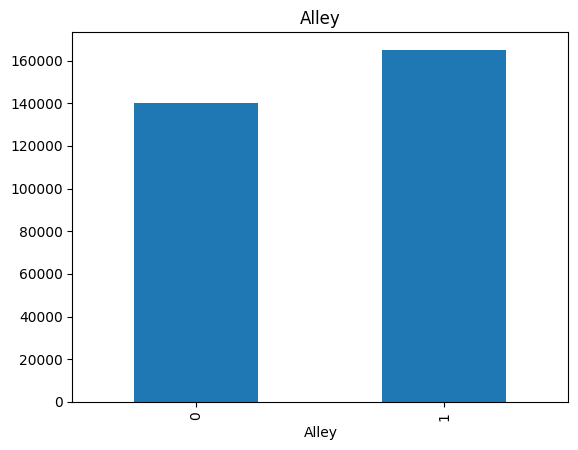

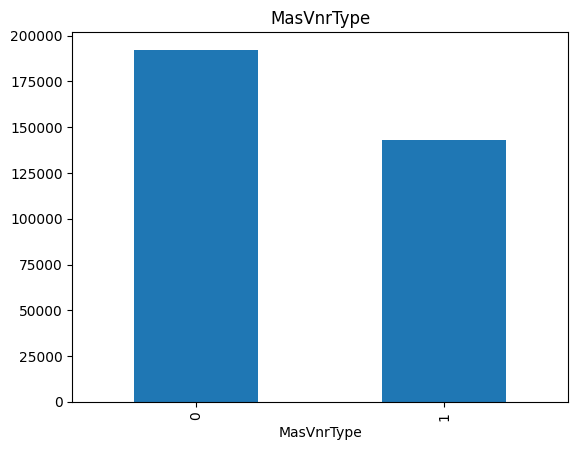

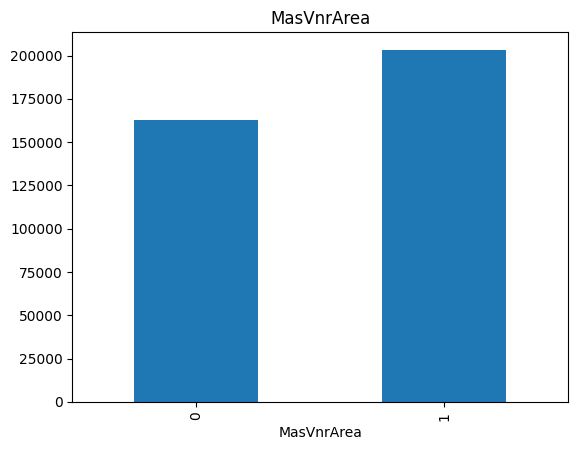

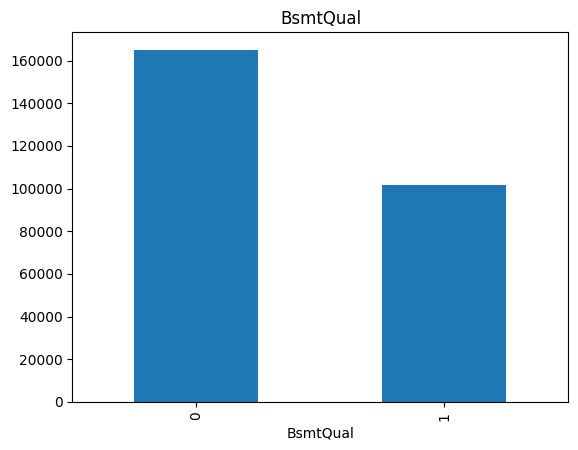

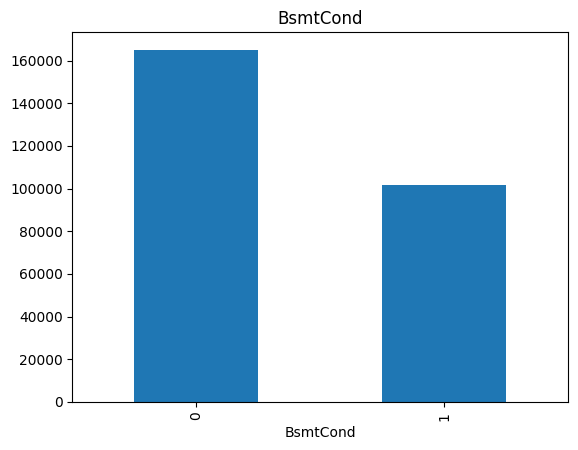

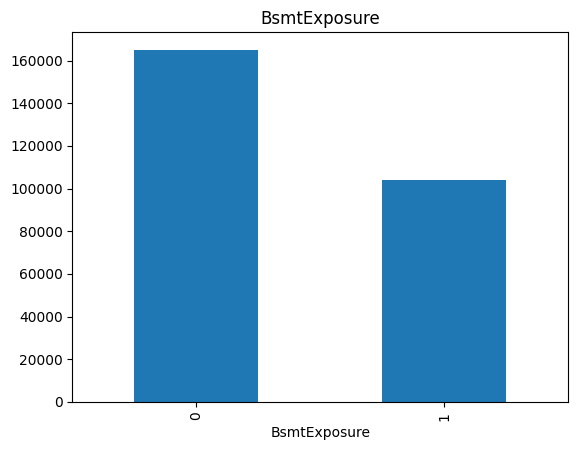

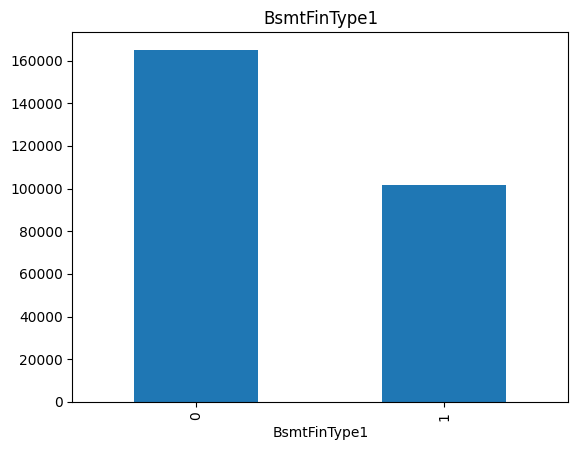

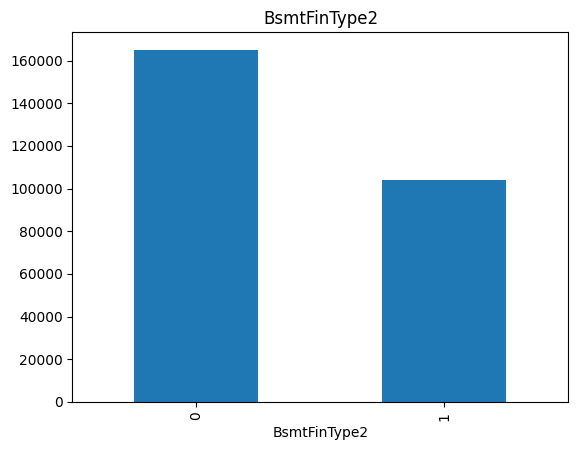

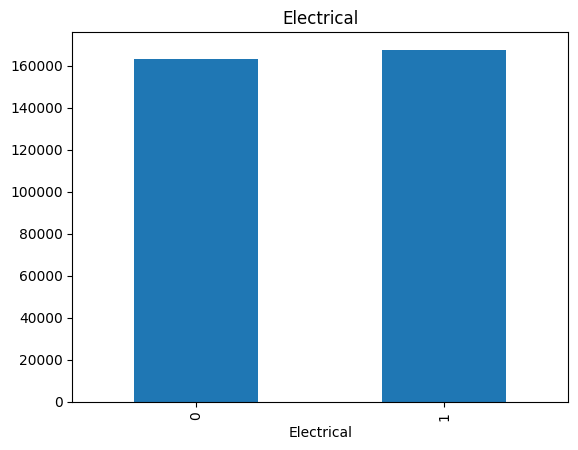

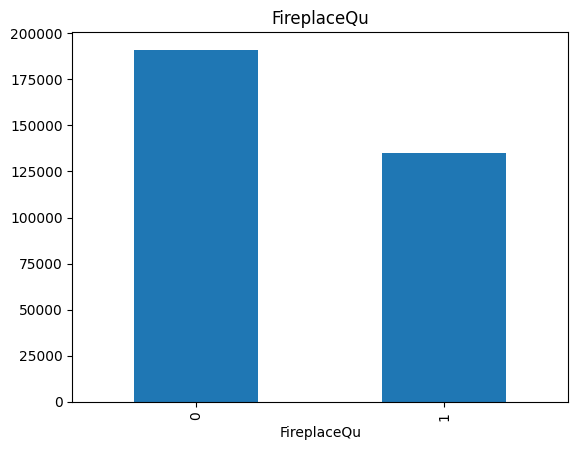

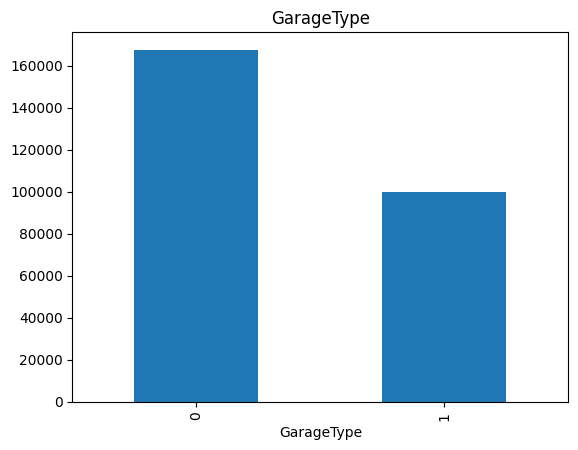

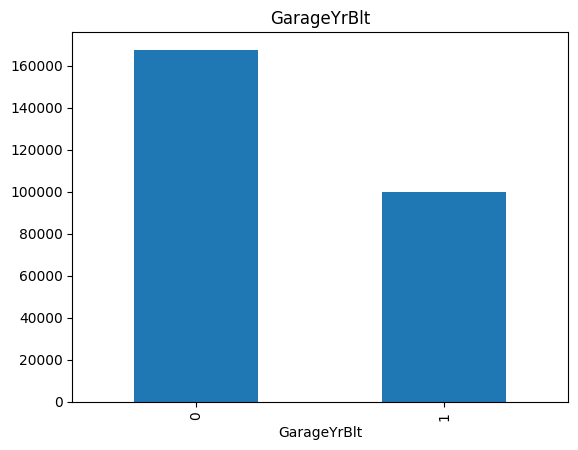

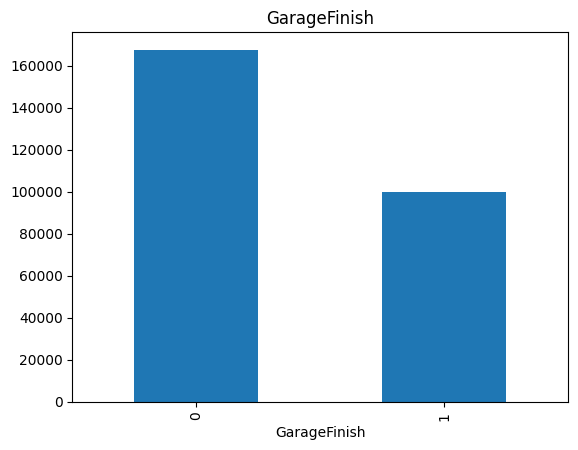

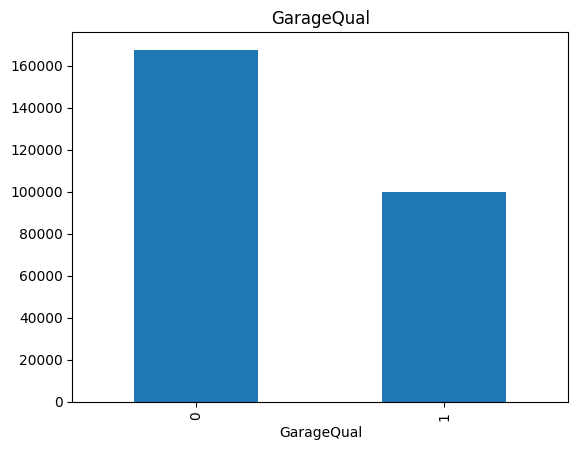

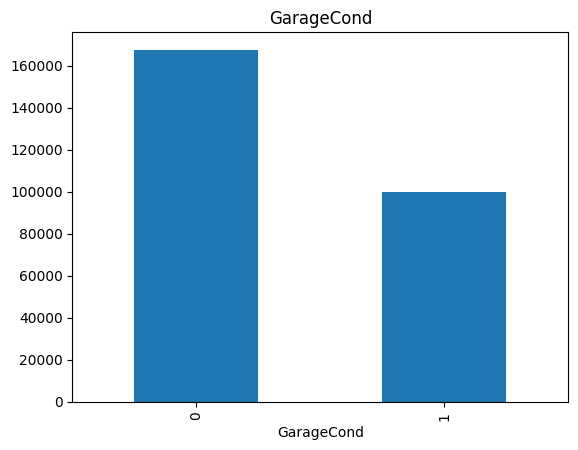

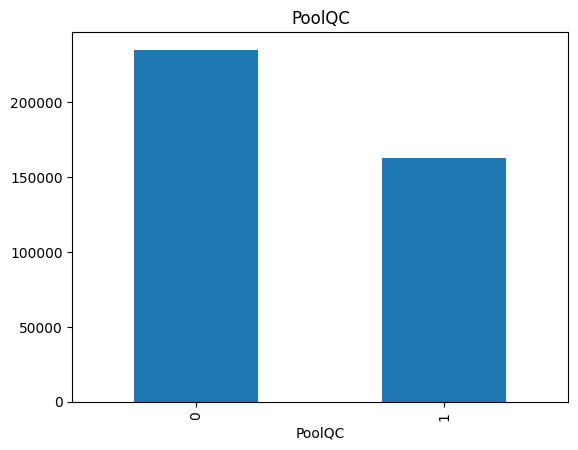

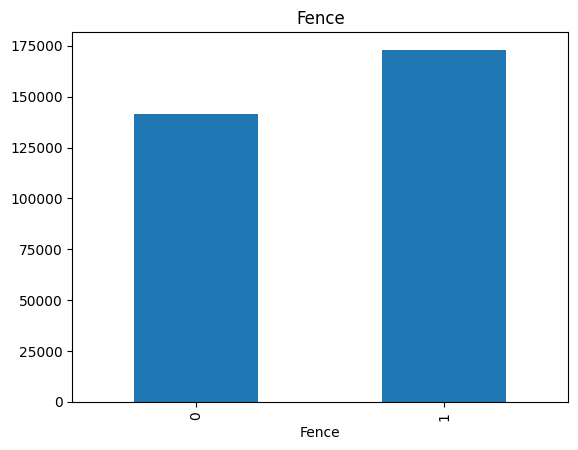

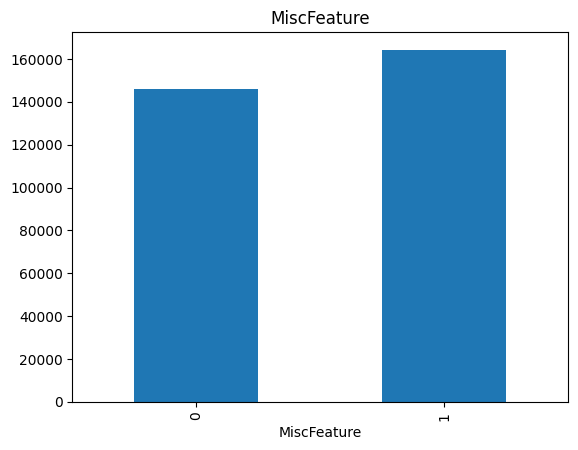

In [20]:
for feature in features_with_nan:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

The prices are higher where nan values are present for certain features and lower for certain features where nan values are present, so these missing features are playing an important role in determining the salesprice.

## Numerical Variables

In [9]:
#numerical variables
numerical_features= [feature for feature in df.columns if df[feature].dtype !='O'and feature !='Id' and feature !='SalePrice']
print('Number of numerical features: ', len(numerical_features))


Number of numerical features:  36


In [10]:
df[numerical_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


From the dataset we have four year variables, lets list them

### Year Variables

In [11]:
year_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
print('Year features: ', year_features)

Year features:  ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [12]:
for feature in year_features:
    print(feature, df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

<Axes: xlabel='YrSold'>

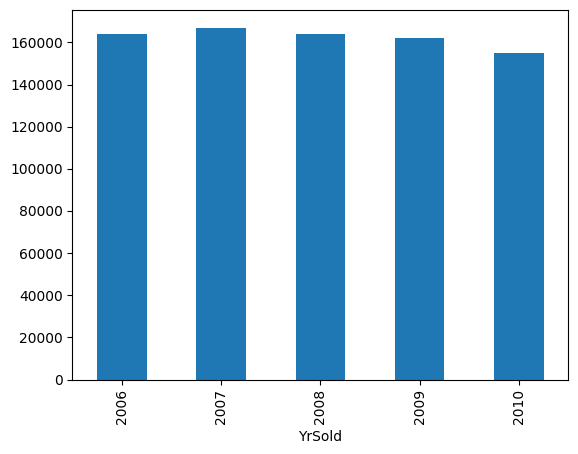

In [17]:
## Relationship between YrSold and SalePrice
df.groupby('YrSold')['SalePrice'].median().plot.bar()

<Axes: xlabel='YrSold'>

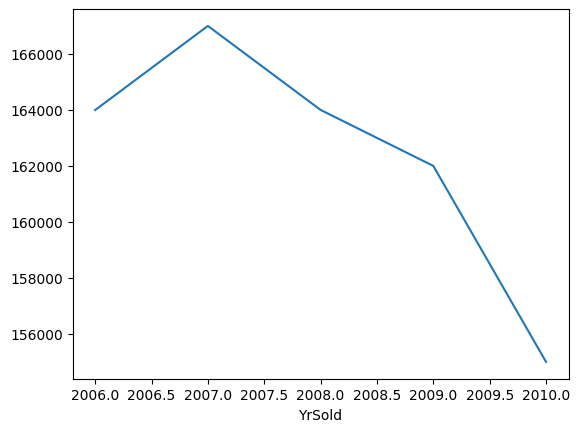

In [14]:
df.groupby('YrSold')['SalePrice'].median().plot()


We use median instead of mean
In Practice:
Use .median() when:

You're dealing with monetary values.

There's a possibility of outliers or skewed data.

Use .mean() when:

The data is symmetrical and not affected by outliers.

Robust to Outliers:

House prices often have outliers — e.g., a few extremely expensive homes. The mean is sensitive to these high (or low) values. The median is robust, giving a better central tendency for skewed distributions.

### Discrete Variables

In [15]:
### Discrete numerical variables
discrete_numerical_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25]
print('Discrete numerical features: ', discrete_numerical_features)

Discrete numerical features:  ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [16]:
df[discrete_numerical_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008


MSSubClass


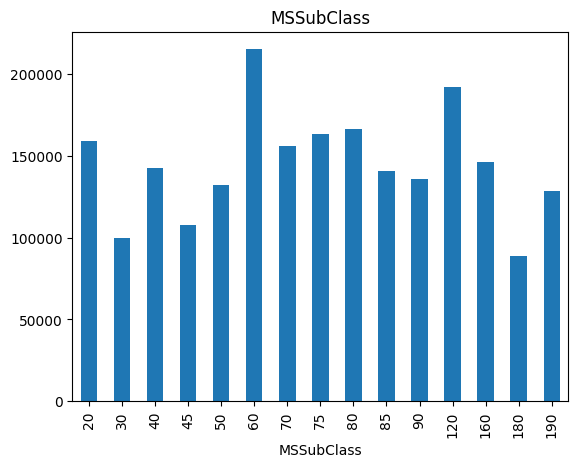

OverallQual


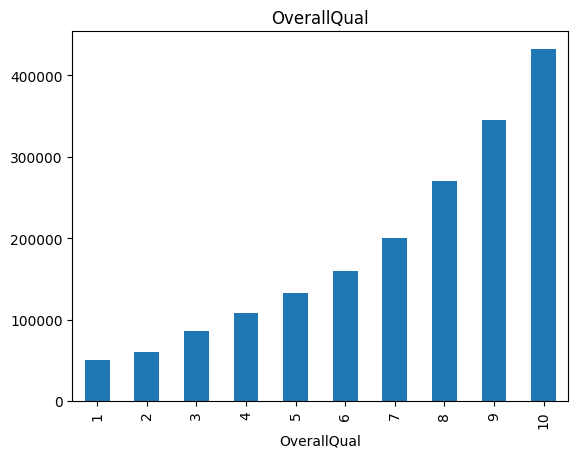

OverallCond


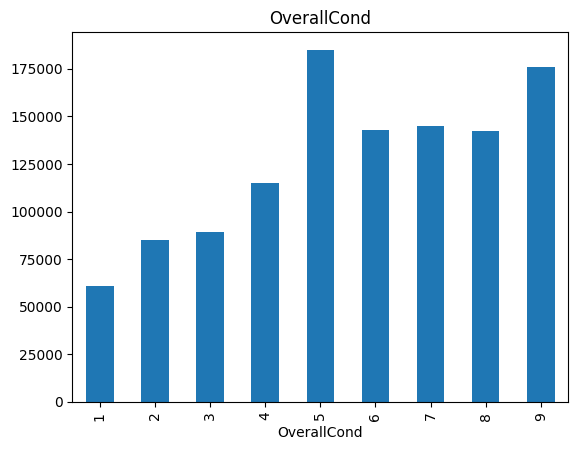

LowQualFinSF


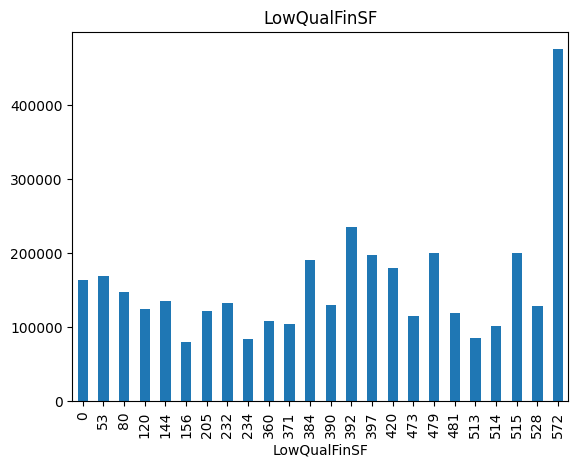

BsmtFullBath


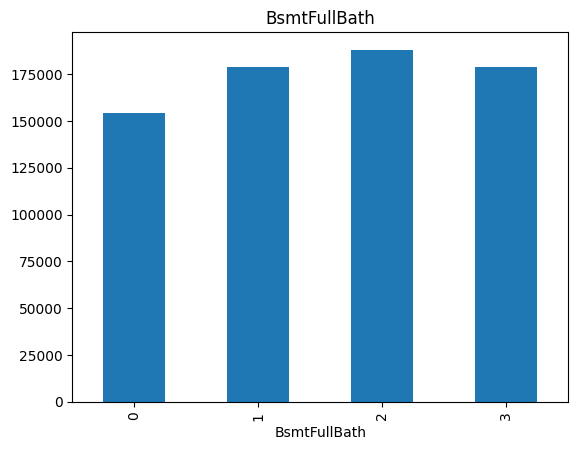

BsmtHalfBath


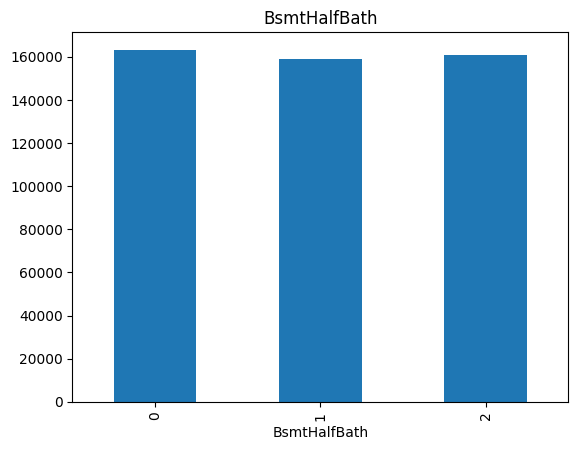

FullBath


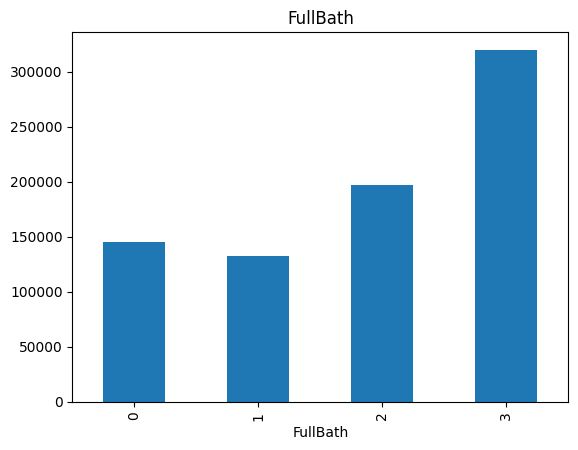

HalfBath


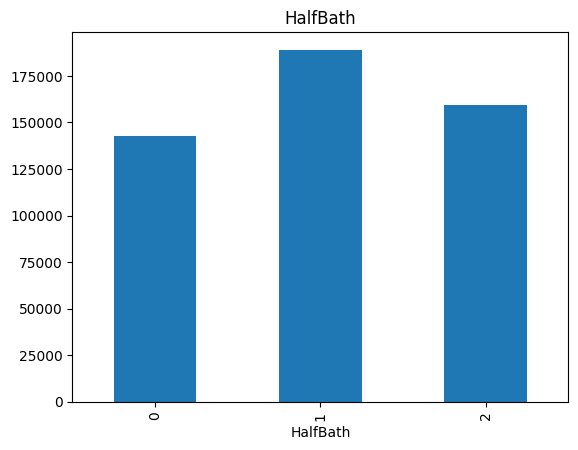

BedroomAbvGr


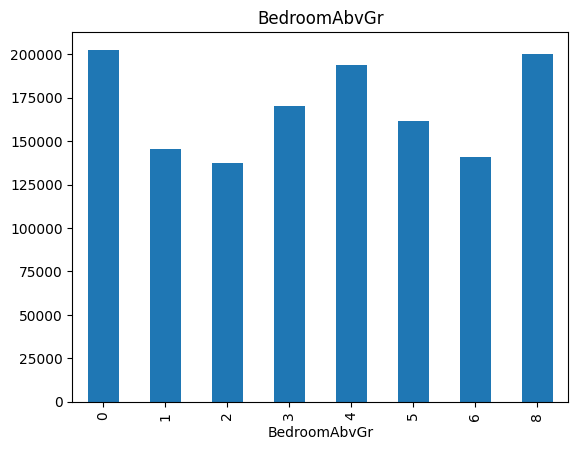

KitchenAbvGr


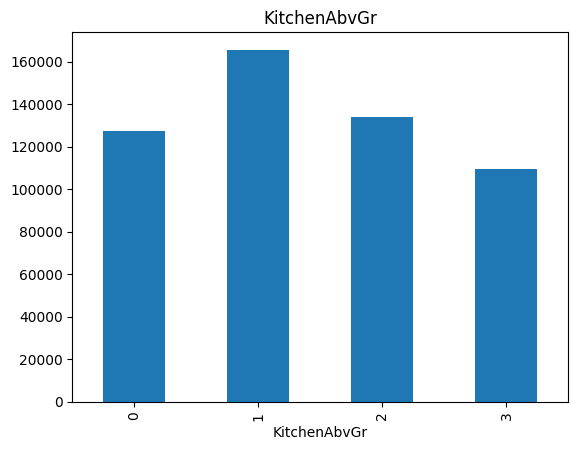

TotRmsAbvGrd


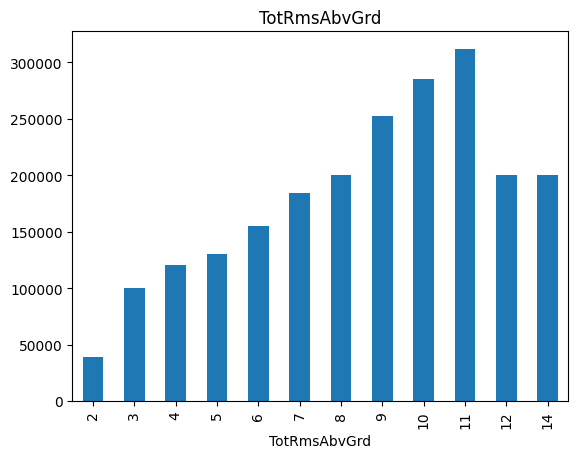

Fireplaces


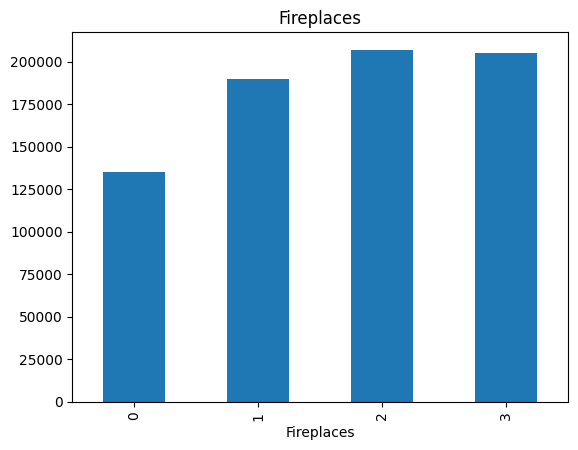

GarageCars


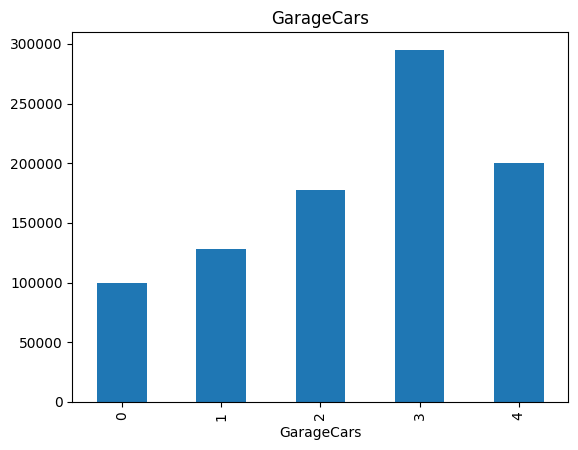

3SsnPorch


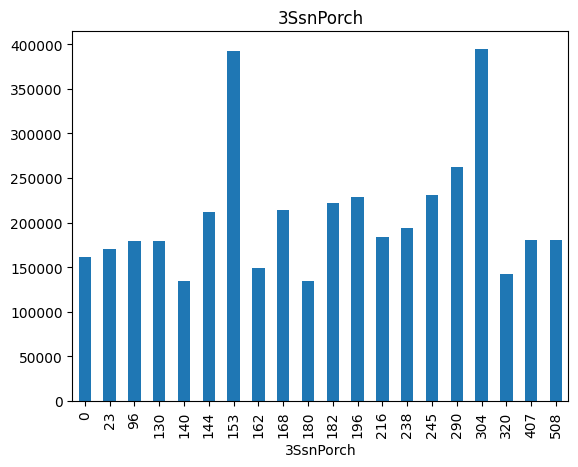

PoolArea


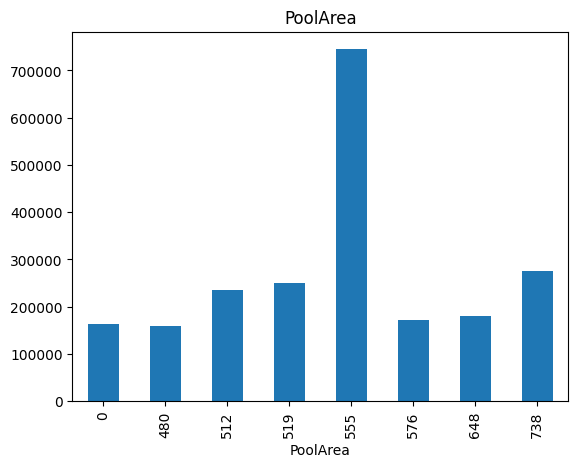

MiscVal


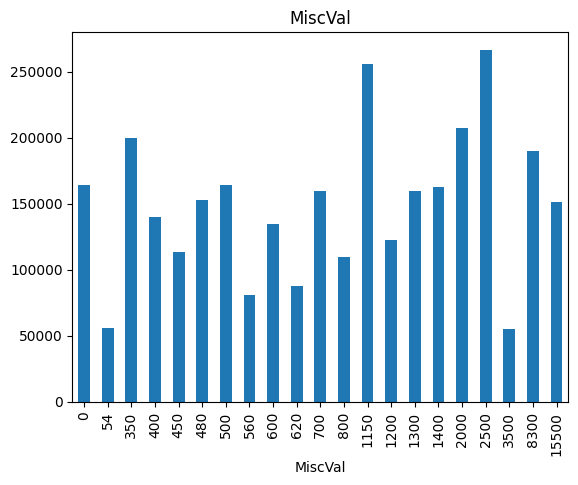

MoSold


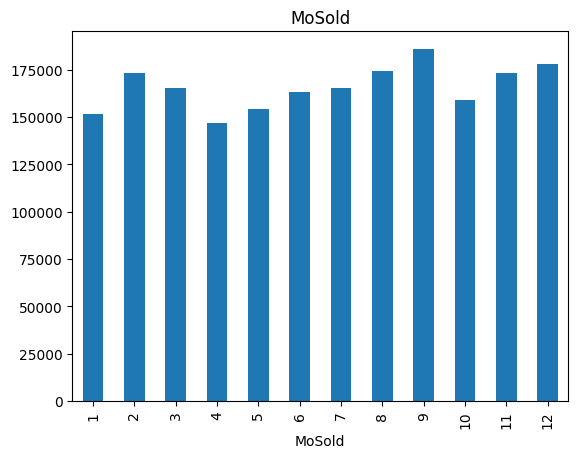

YrSold


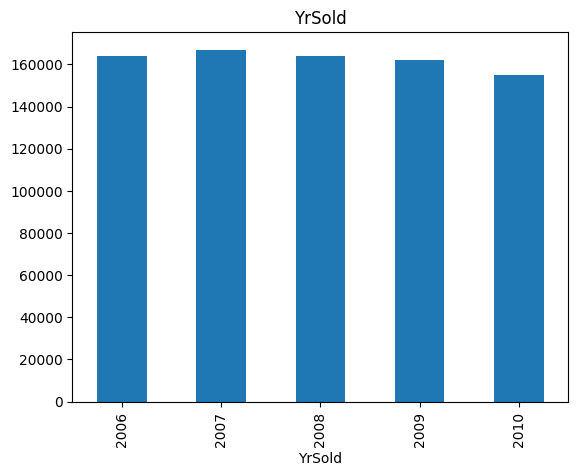

In [28]:
## Relationship between discrete numerical features and SalePrice
for feature in discrete_numerical_features:
    data = df.copy()
    print(feature)
    # print(data.groupby(feature).head())
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

### Continuous Variables

| **Aspect**         | **Histogram**                                       | **Bar Plot**                          |
| ------------------ | --------------------------------------------------- | ------------------------------------- |
| **Type of data**   | Continuous (numerical) data                         | Categorical (discrete) data           |
| **Goal**           | Show the distribution of data over intervals (bins) | Compare quantities between categories |
| **X-axis meaning** | Intervals (ranges of values)                        | Distinct categories or groups         |


| Feature            | Histogram                                  | Bar Plot                                               |
| ------------------ | ------------------------------------------ | ------------------------------------------------------ |
| **X-axis**         | Divided into bins (e.g., ages 0–10, 11–20) | Separate categories (e.g., “Cat”, “Dog”, “Rabbit”)     |
| **Bar width**      | Corresponds to bin width                   | Irrelevant; spacing between bars emphasizes separation |
| **Height meaning** | Frequency (count) or density               | Statistic (mean, sum, count, etc.)                     |
| **Example**        | Distribution of heights of people          | Number of pets of each type                            |


In [29]:
continuous_numerical_features = [feature for feature in numerical_features if feature not in year_features and feature not in discrete_numerical_features and feature != 'SalePrice' and feature != 'Id']
print('Continuous numerical features: ', continuous_numerical_features)

df[continuous_numerical_features].head()

Continuous numerical features:  ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0


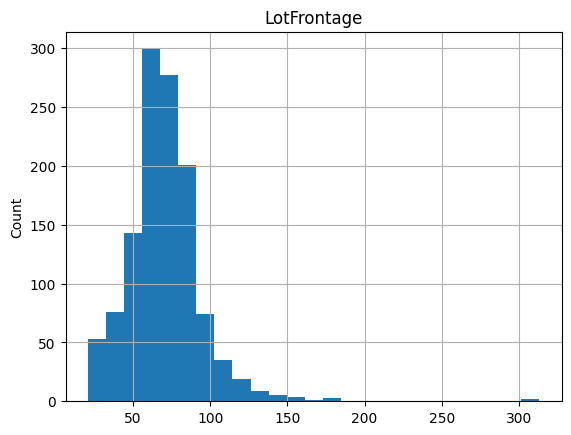

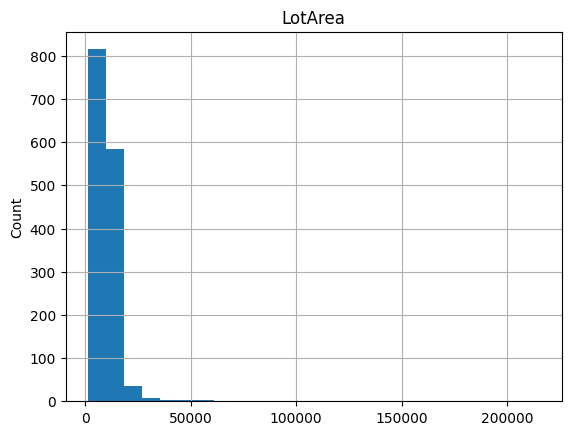

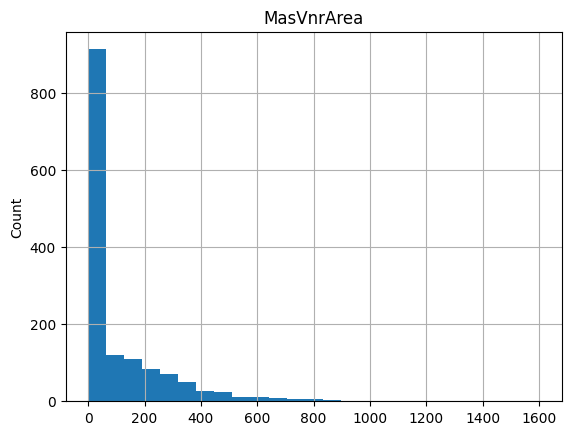

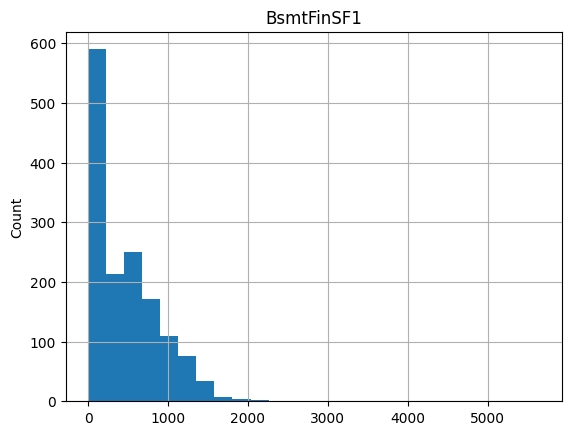

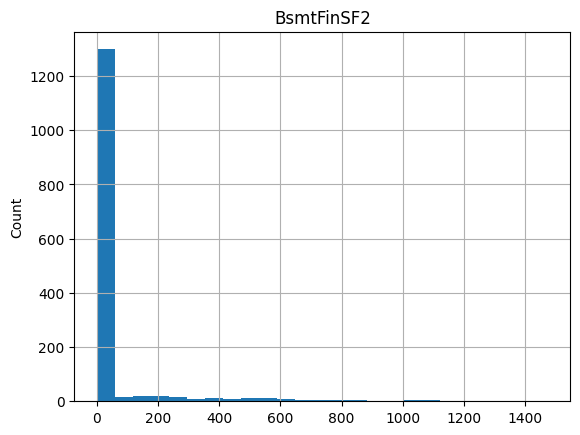

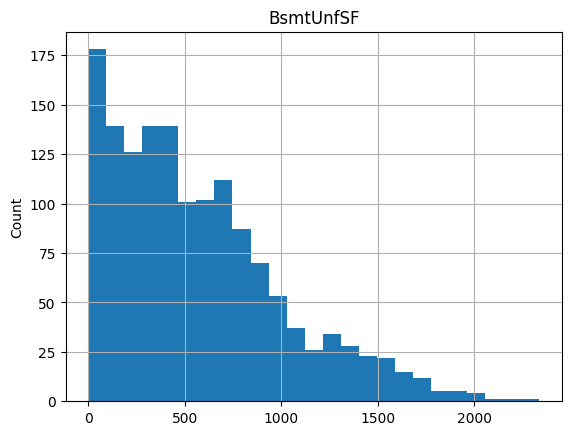

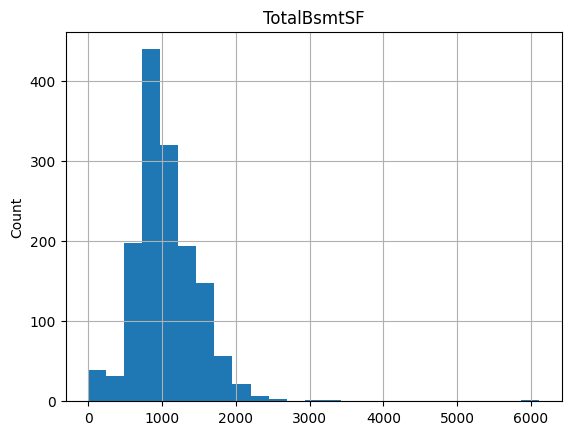

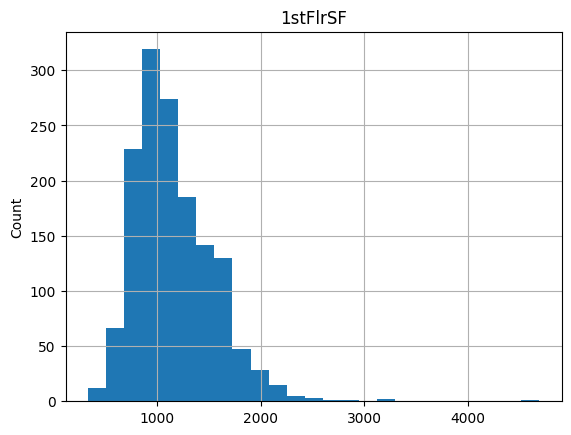

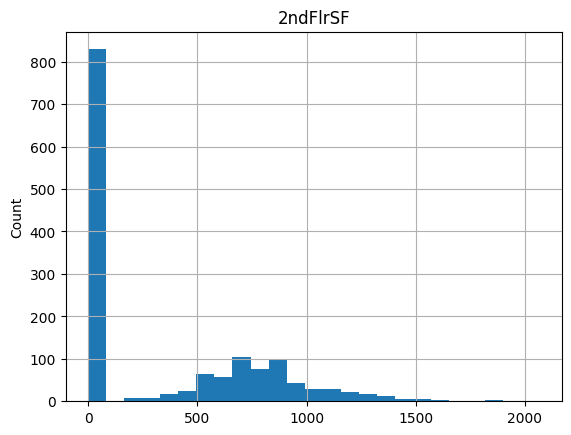

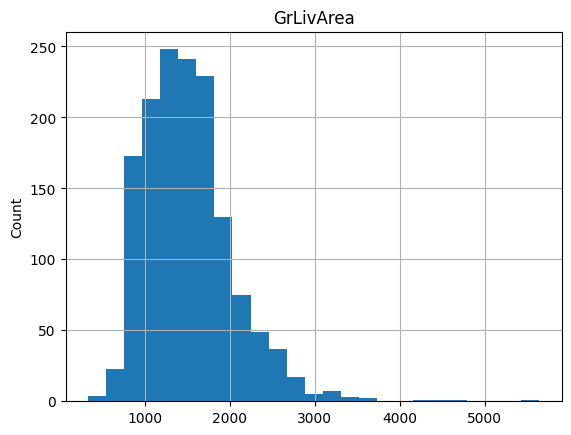

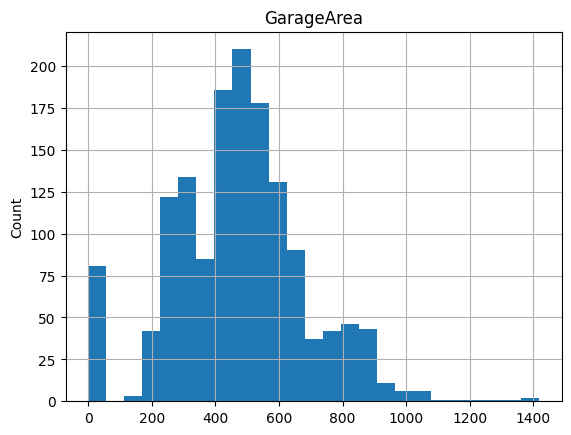

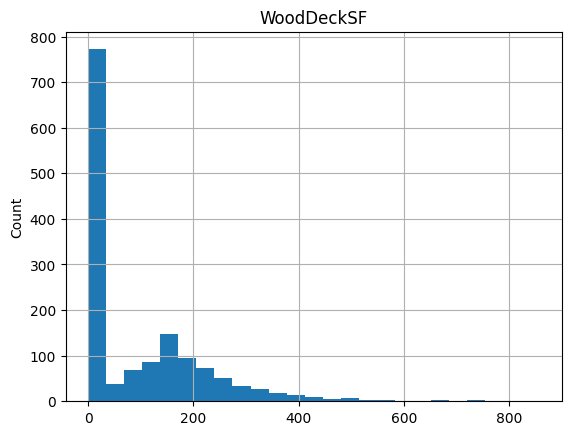

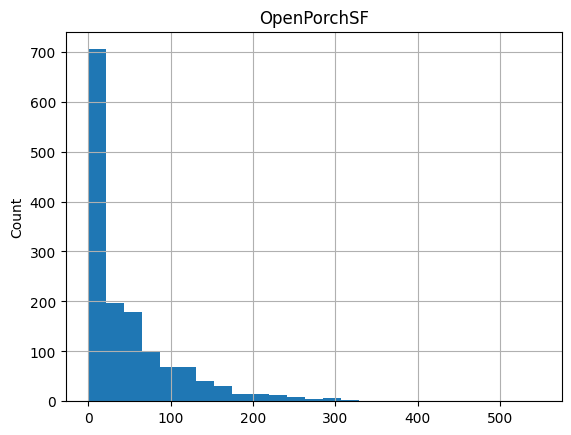

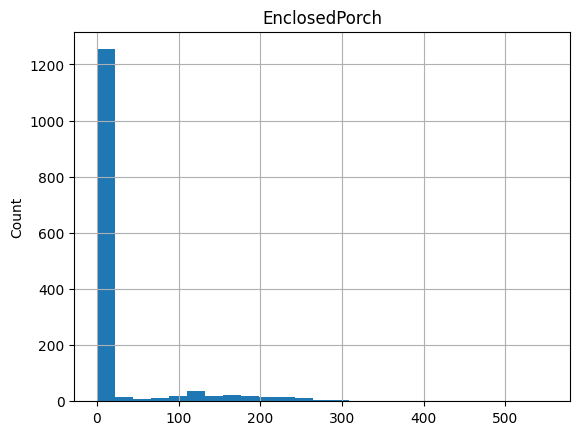

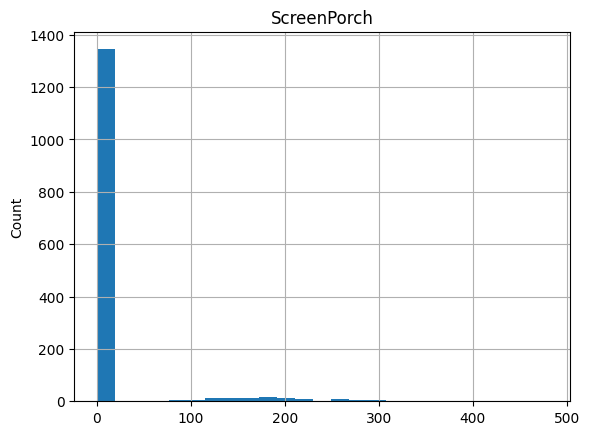

In [32]:
for feature in continuous_numerical_features:
    data = df.copy()
    df[feature].hist(bins=25)
    plt.title(feature)
    plt.ylabel('Count')
    plt.show()

Features are skewed, we want to use log transformation to convert them into non skewed normal distributions

Minimum value of LotFrontage: 21.0


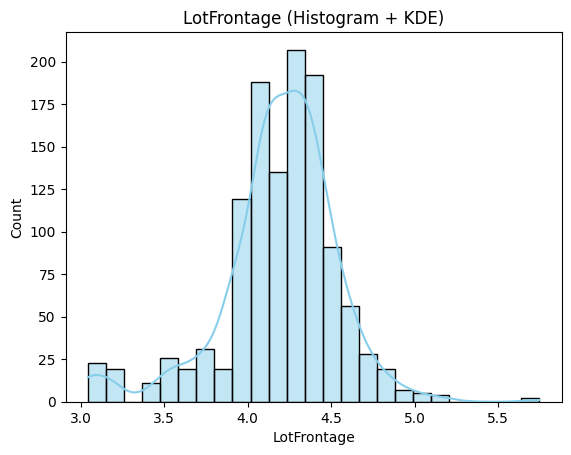

Minimum value of LotArea: 1300


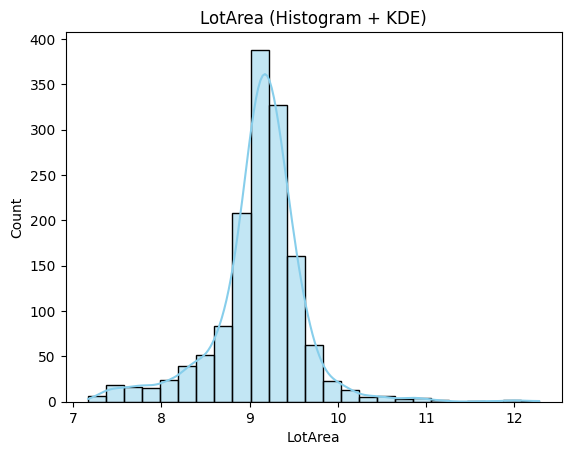

Minimum value of MasVnrArea: 0.0


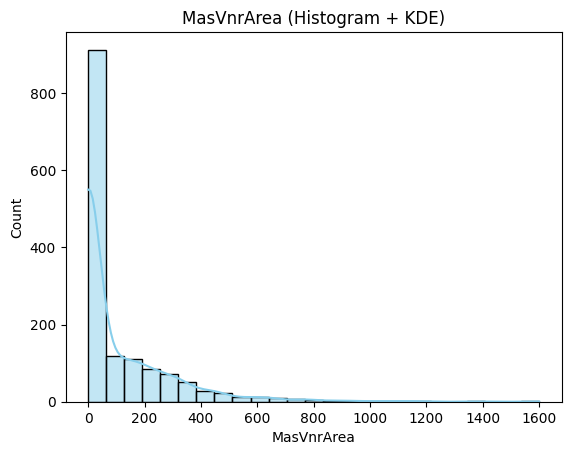

Minimum value of BsmtFinSF1: 0


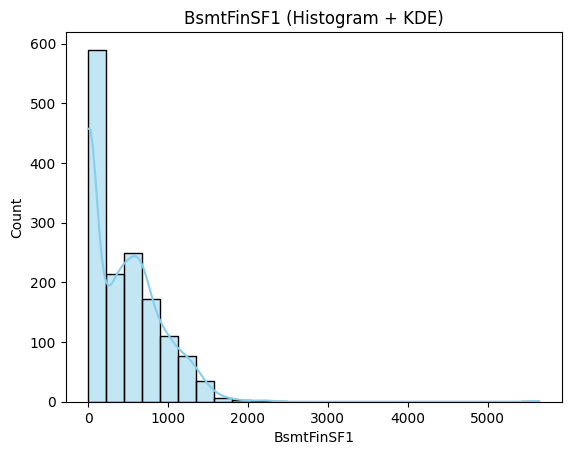

Minimum value of BsmtFinSF2: 0


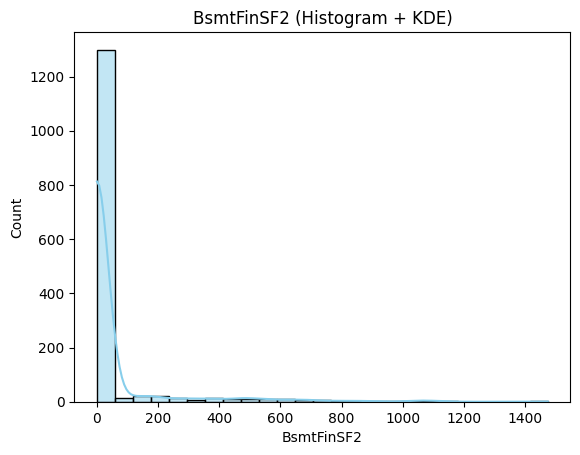

Minimum value of BsmtUnfSF: 0


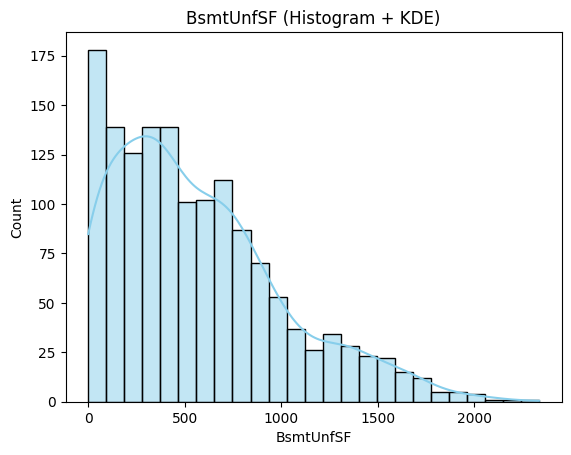

Minimum value of TotalBsmtSF: 0


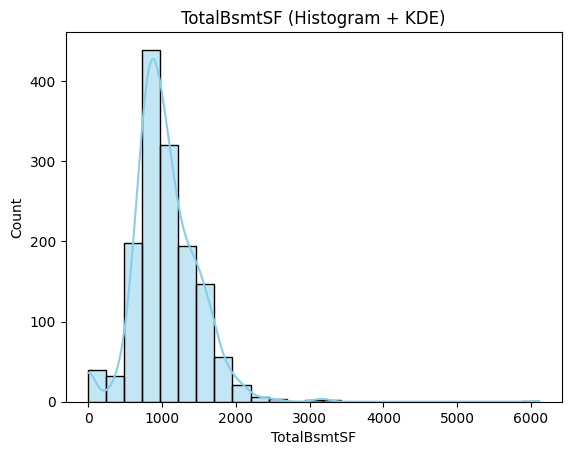

Minimum value of 1stFlrSF: 334


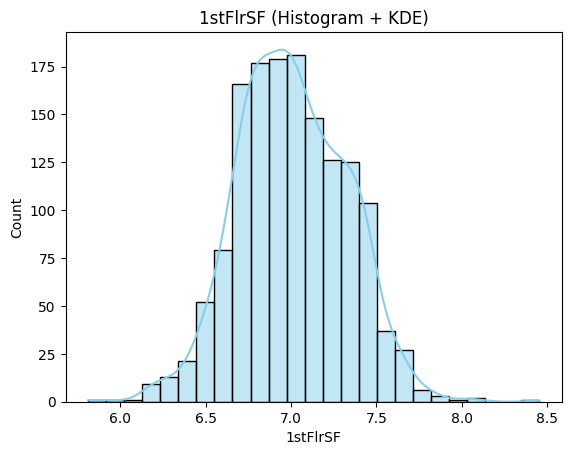

Minimum value of 2ndFlrSF: 0


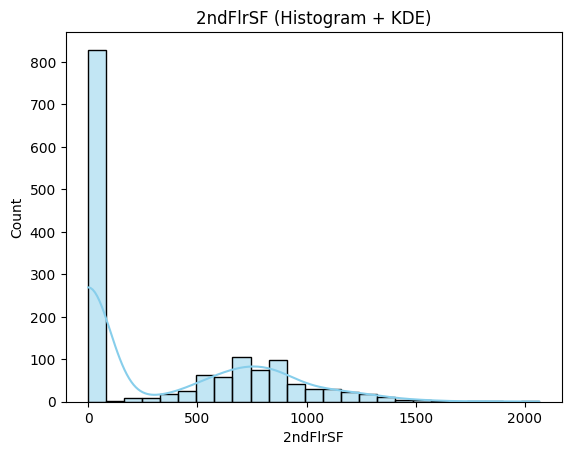

Minimum value of GrLivArea: 334


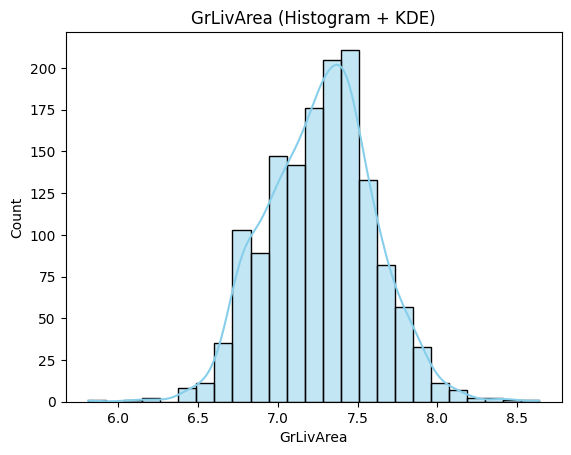

Minimum value of GarageArea: 0


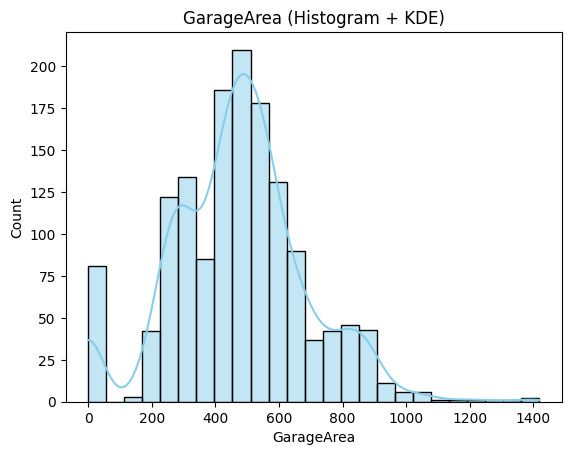

Minimum value of WoodDeckSF: 0


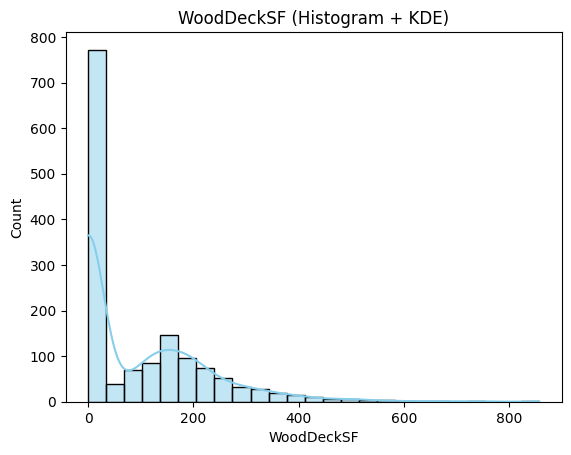

Minimum value of OpenPorchSF: 0


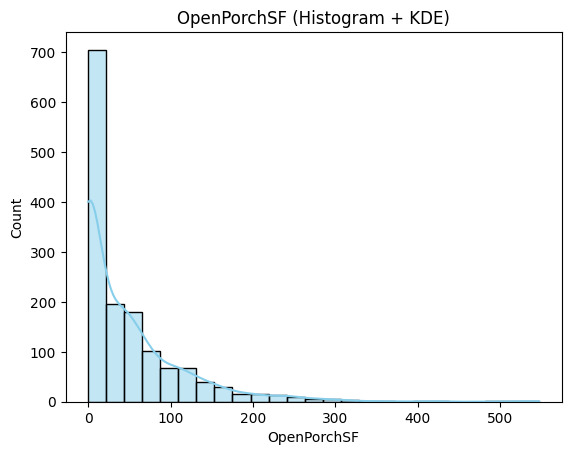

Minimum value of EnclosedPorch: 0


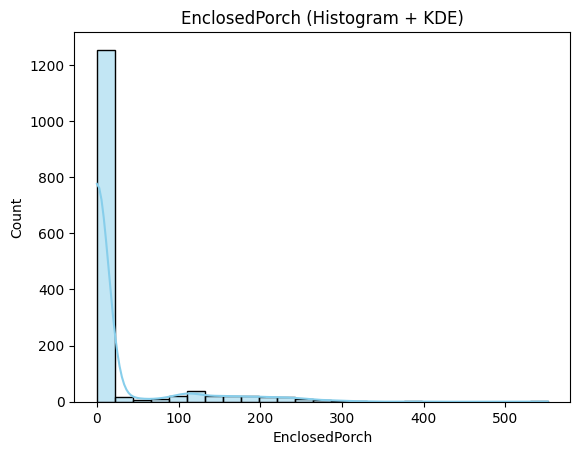

Minimum value of ScreenPorch: 0


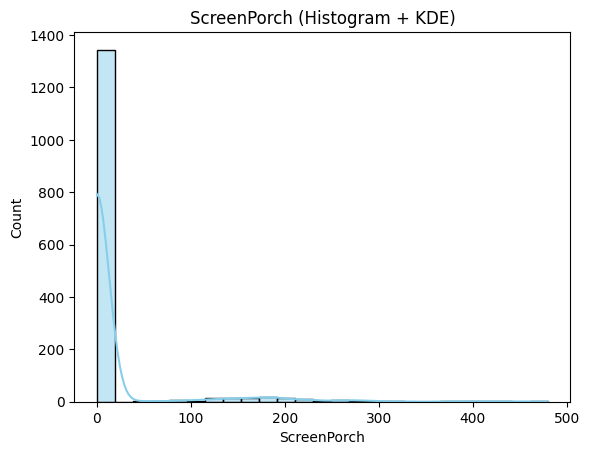

In [50]:
# Convert numerical features to log scale
for feature in continuous_numerical_features:
    data=df.copy()
    min_val = data[feature].min()
    print(f"Minimum value of {feature}: {min_val}")
    if min_val <= 0:
        pass
    else:
        data[feature] = np.log(data[feature])
    sns.histplot(data[feature], bins=25, kde=True, color="skyblue")
    plt.title(f"{feature} (Histogram + KDE)")
    plt.ylabel('Count')
    plt.show()

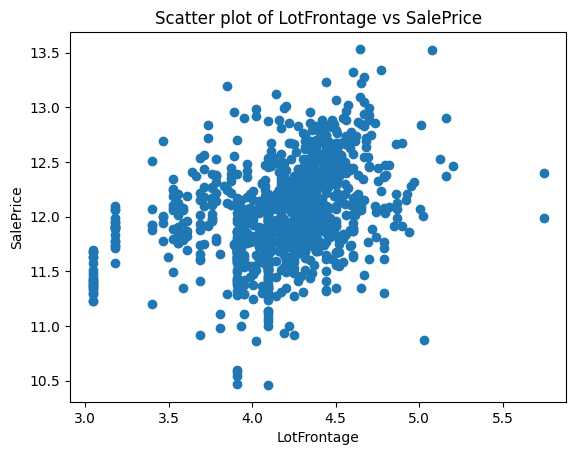

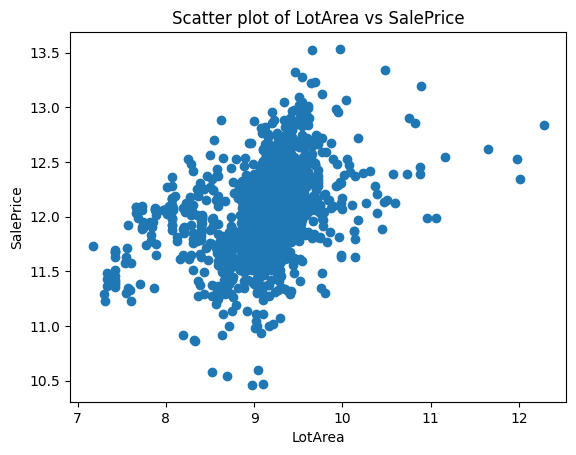

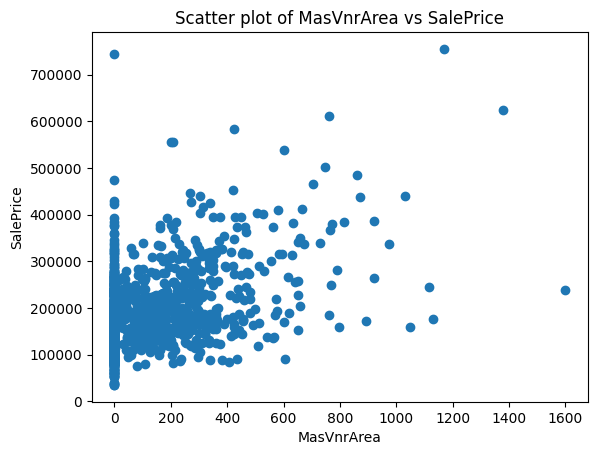

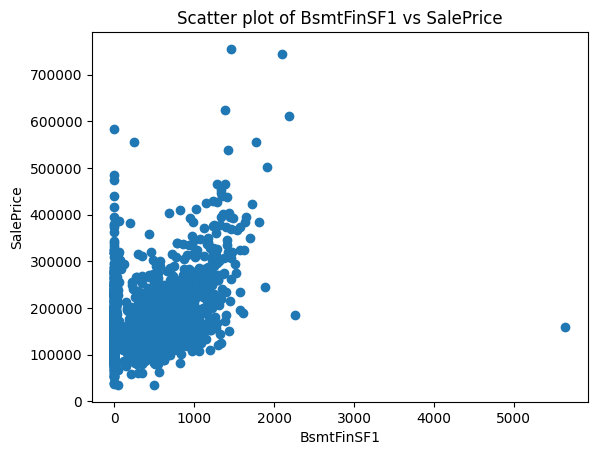

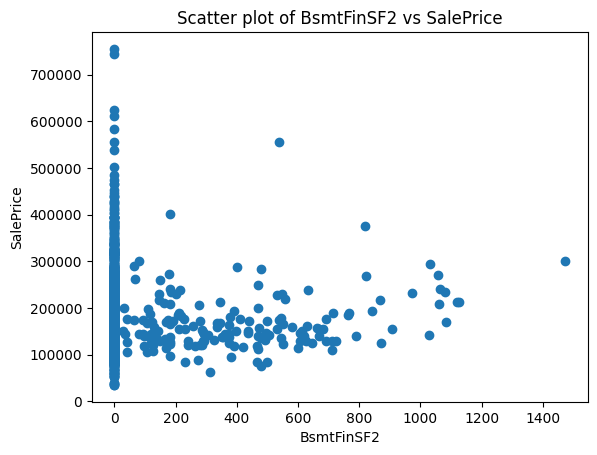

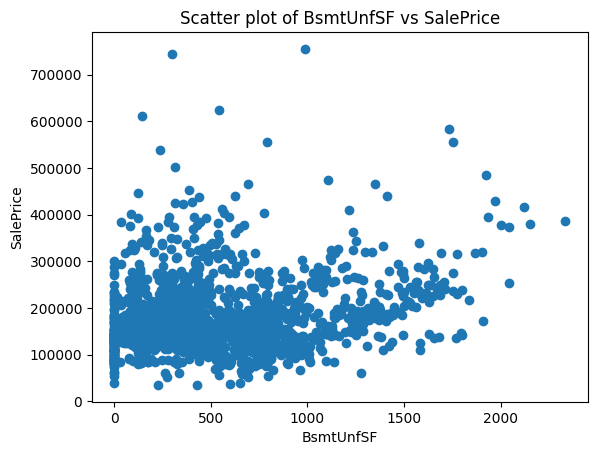

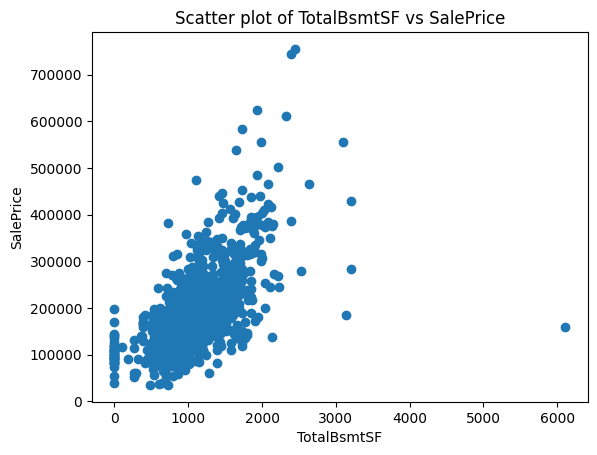

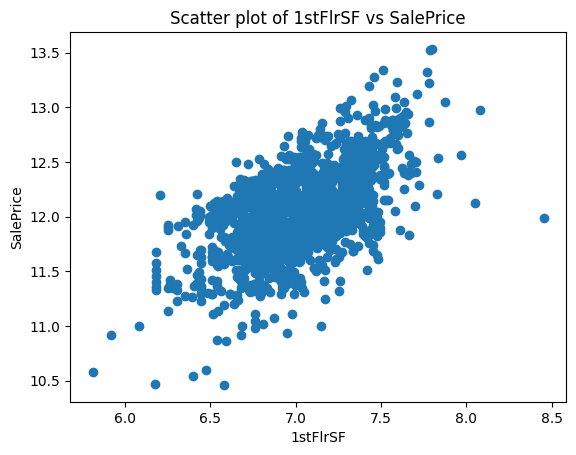

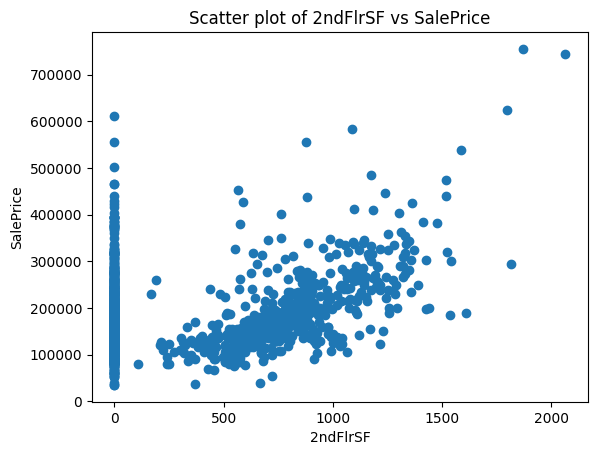

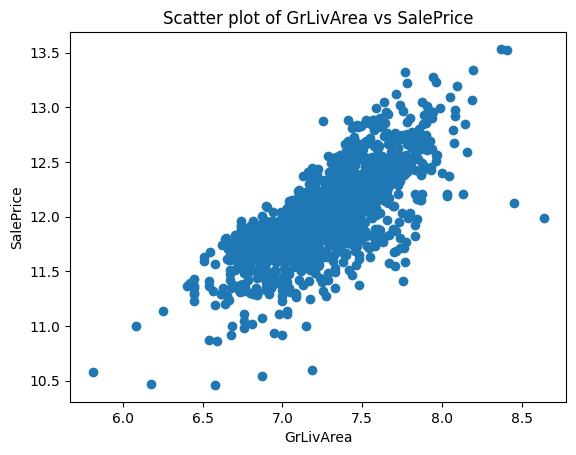

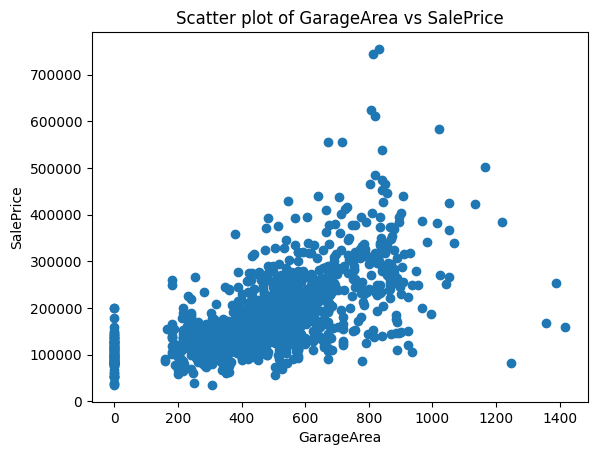

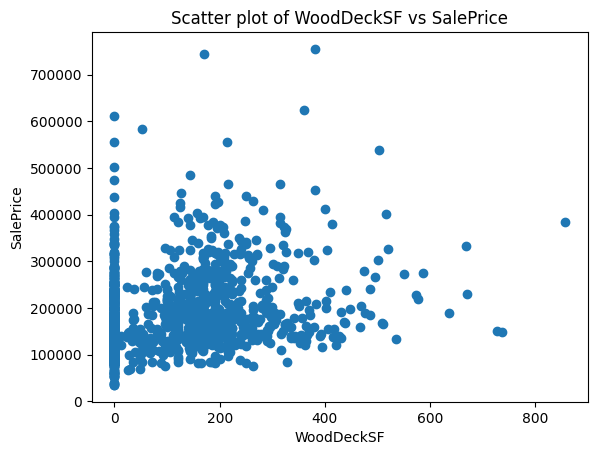

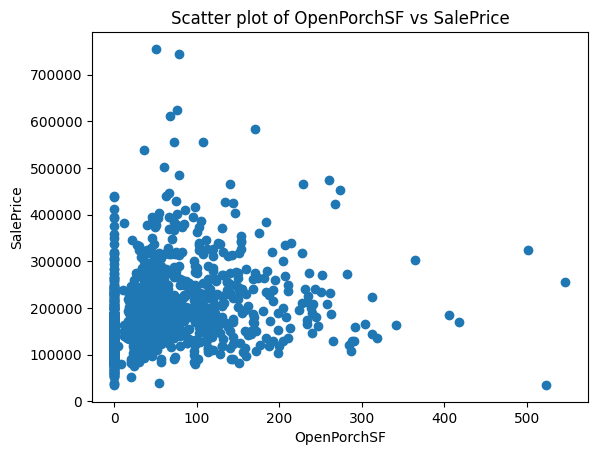

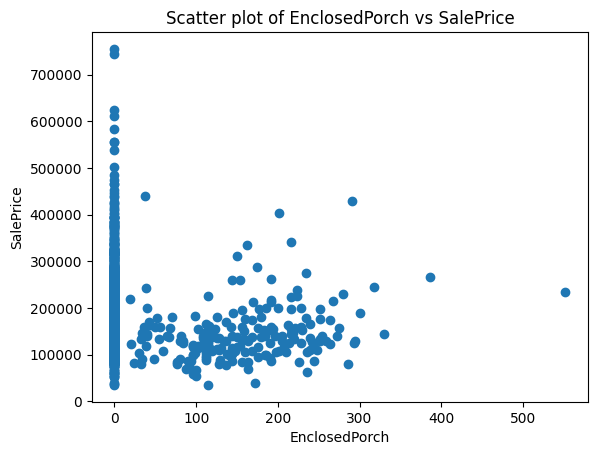

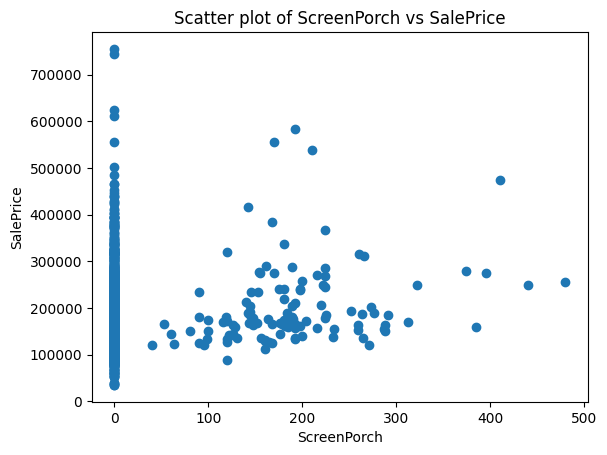

In [36]:
## Scatter plot
for feature in continuous_numerical_features:
    data = df.copy()
    ##apply log transformation
    min_val = data[feature].min()
    if min_val <= 0:
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
    plt.scatter(data[feature], data['SalePrice'])
    plt.title(f'Scatter plot of {feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()
    


### Checking outliers

-  Box Plot with Percentiles

A **box plot** is a compact summary of the distribution of a **numerical feature**.  
It shows the spread, central tendency, and outliers.

---

-  Key Percentiles:
- **25th percentile (Q1)** → value below which 25% of the data lies.
- **75th percentile (Q3)** → value below which 75% of the data lies.
- **Interquartile Range (IQR)** = Q3 − Q1 → covers the middle 50% of the data.

---

-  How it’s built:
1. **The Box**  
   - Lower edge = **Q1 (25th percentile)**  
   - Upper edge = **Q3 (75th percentile)**  
   - The box contains the **middle 50%** of your data.

2. **Median (50th percentile)**  
   - A line inside the box marks the **50th percentile** (half the data lies below, half above).

3. **Whiskers**  
   - Lower whisker: from Q1 down to the smallest value ≥ Q1 − 1.5×IQR  
   - Upper whisker: from Q3 up to the largest value ≤ Q3 + 1.5×IQR

4. **Outliers**  
   - Any value < Q1 − 1.5×IQR or > Q3 + 1.5×IQR is plotted individually as a point.

---


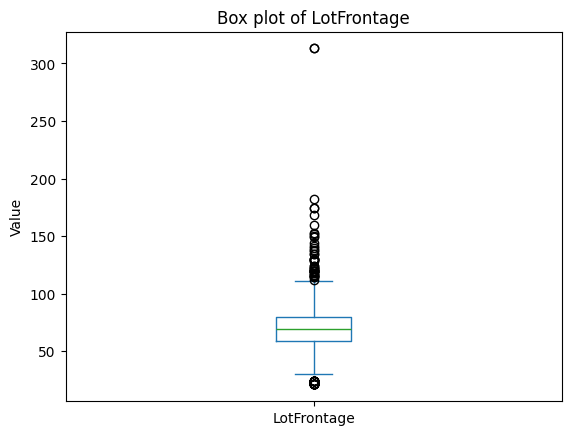

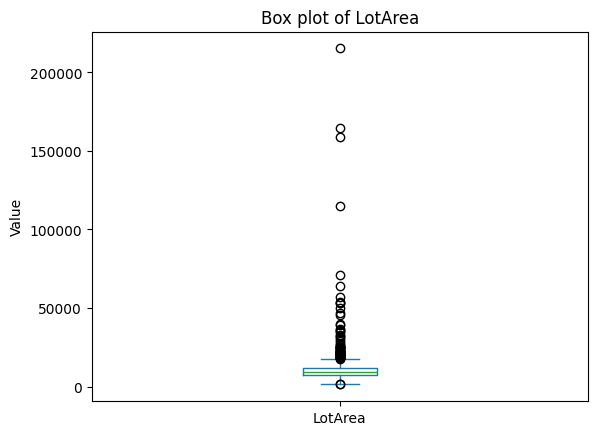

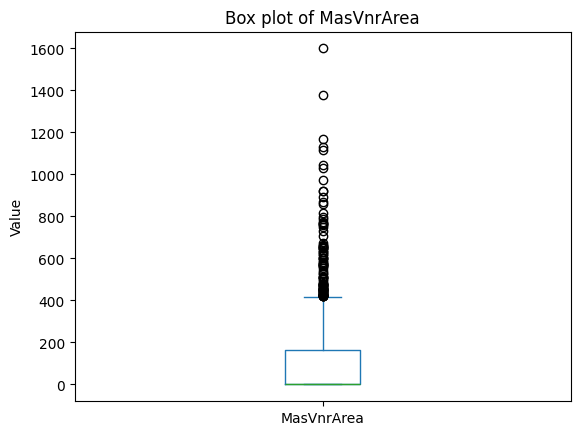

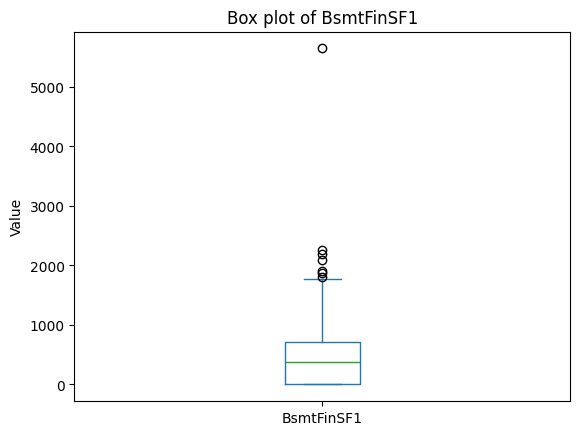

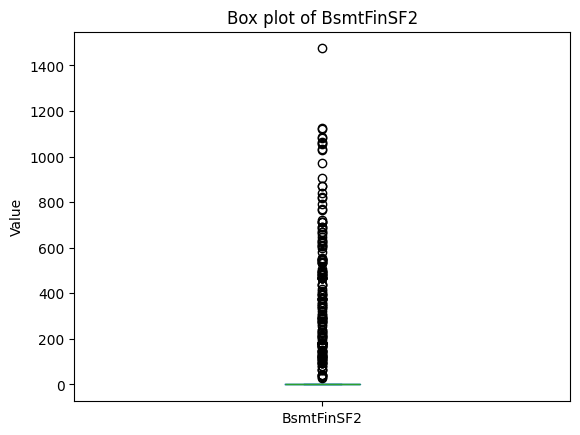

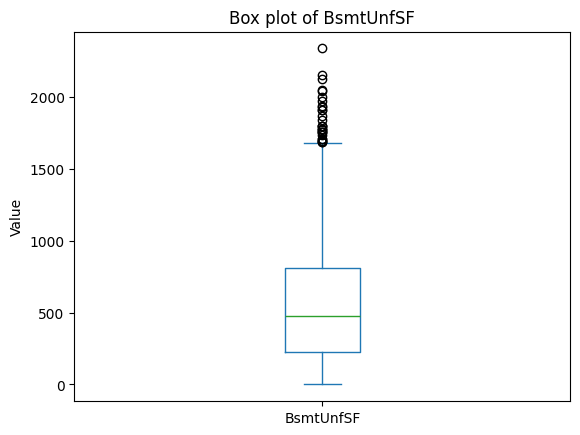

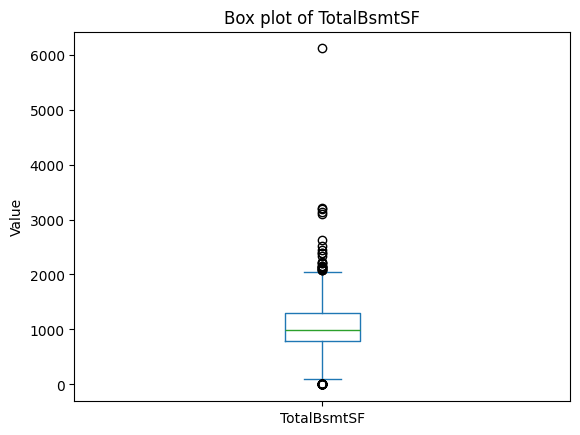

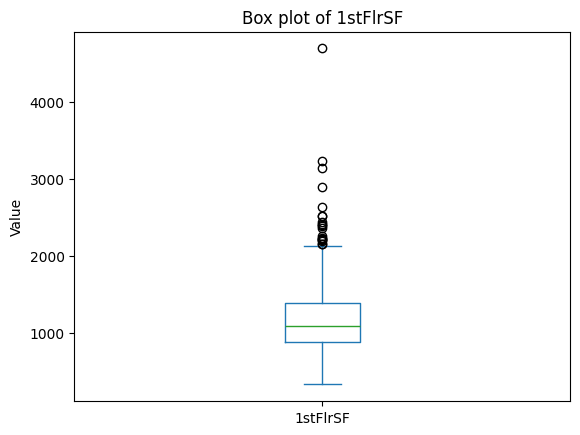

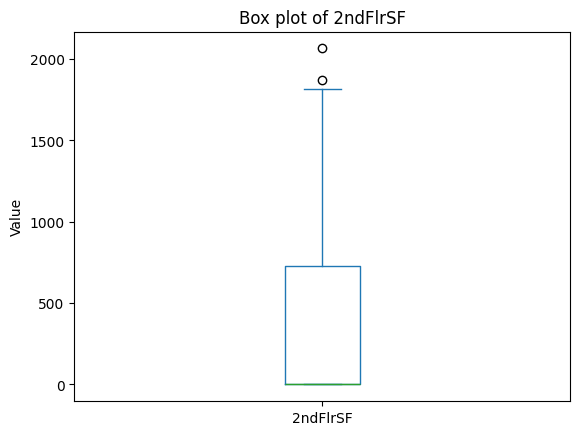

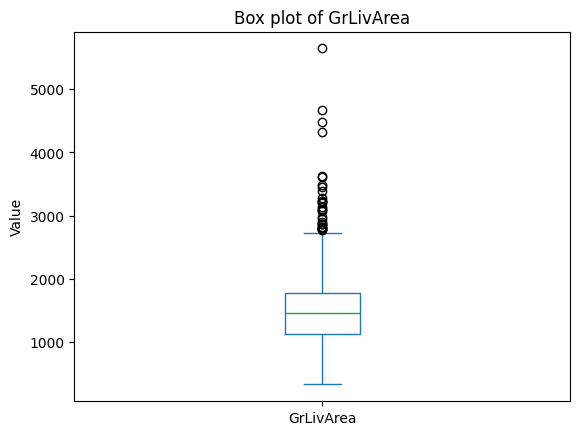

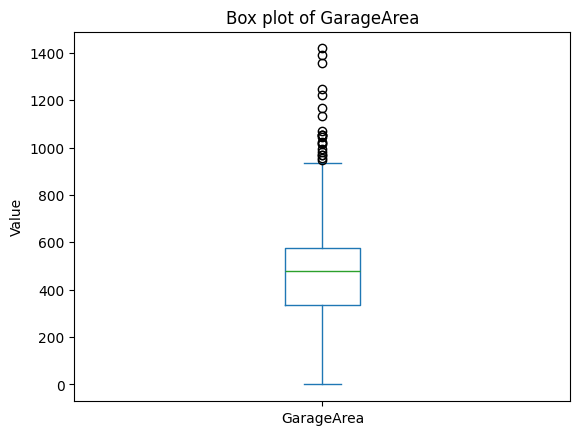

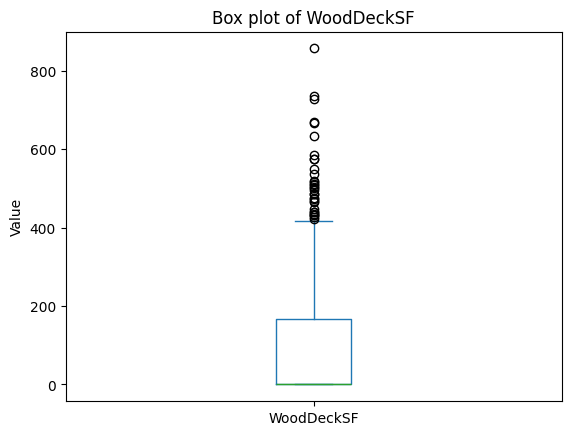

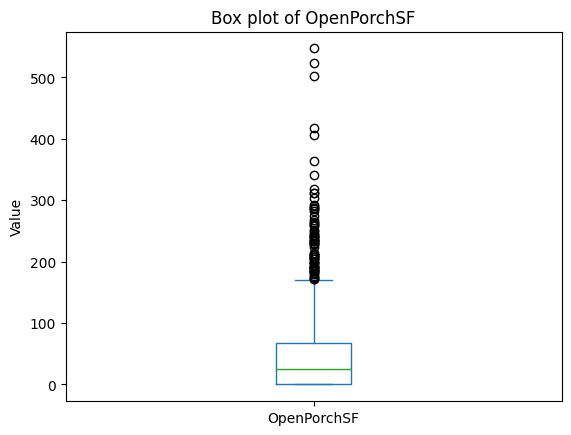

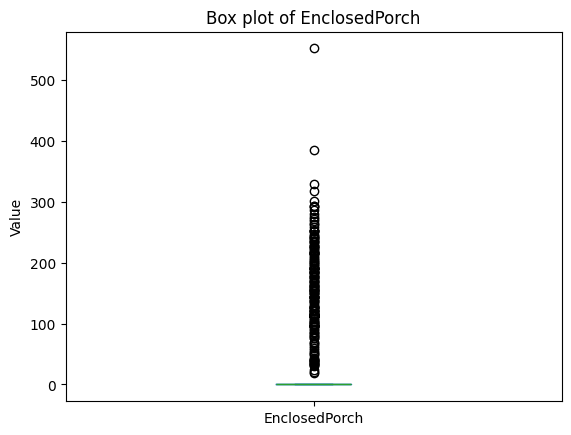

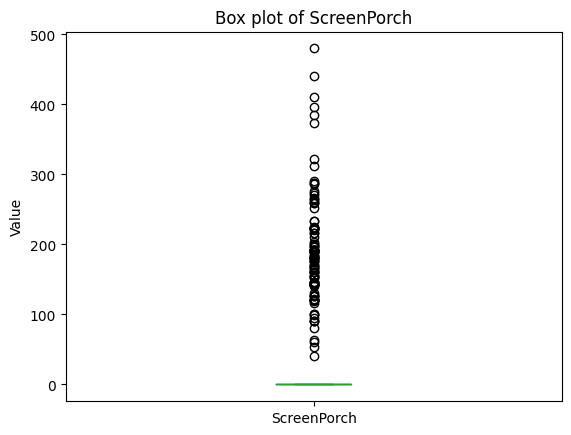

In [44]:
for feature in continuous_numerical_features:
    data = df.copy()
    min_val = data[feature].min()
    if min_val <= 0:
        pass
    else:
        data[feature] = np.log(data[feature])
    df[feature].plot.box()
    plt.ylabel('Value')
    # yrange = df[feature].max() - df[feature].min()
    plt.title(f'Box plot of {feature}')
    plt.show()


## Categorical Features

In [45]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' and feature != 'Id']
print('Categorical features: ', categorical_features)

Categorical features:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [46]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [48]:
len(categorical_features)

43

In [47]:
# number of unique values in each categorical feature
for feature in categorical_features:
    print(feature, df[feature].nunique(), 'unique values')

MSZoning 5 unique values
Street 2 unique values
Alley 2 unique values
LotShape 4 unique values
LandContour 4 unique values
Utilities 2 unique values
LotConfig 5 unique values
LandSlope 3 unique values
Neighborhood 25 unique values
Condition1 9 unique values
Condition2 8 unique values
BldgType 5 unique values
HouseStyle 8 unique values
RoofStyle 6 unique values
RoofMatl 8 unique values
Exterior1st 15 unique values
Exterior2nd 16 unique values
MasVnrType 3 unique values
ExterQual 4 unique values
ExterCond 5 unique values
Foundation 6 unique values
BsmtQual 4 unique values
BsmtCond 4 unique values
BsmtExposure 4 unique values
BsmtFinType1 6 unique values
BsmtFinType2 6 unique values
Heating 6 unique values
HeatingQC 5 unique values
CentralAir 2 unique values
Electrical 5 unique values
KitchenQual 4 unique values
Functional 7 unique values
FireplaceQu 5 unique values
GarageType 6 unique values
GarageFinish 3 unique values
GarageQual 5 unique values
GarageCond 5 unique values
PavedDrive 3 u

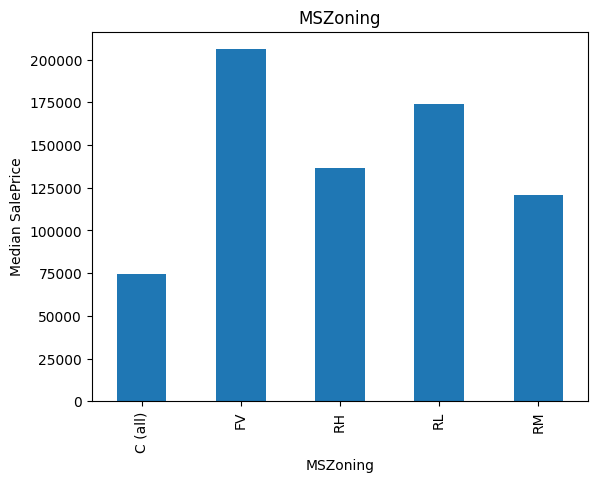

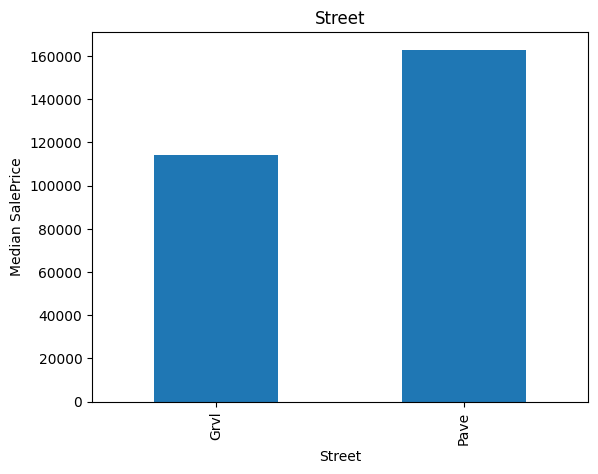

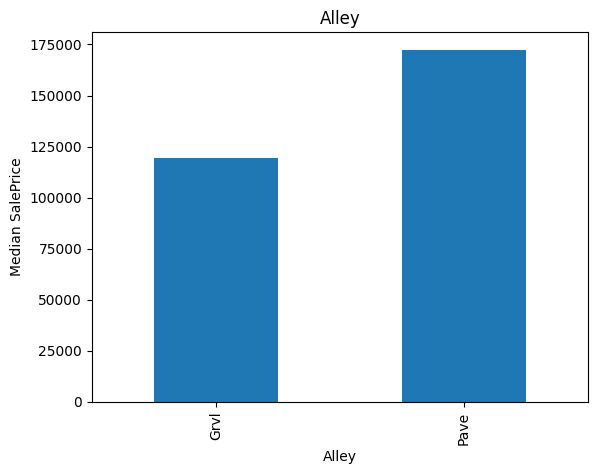

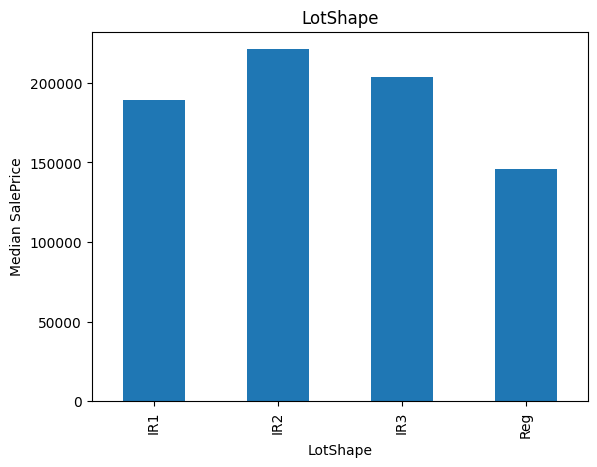

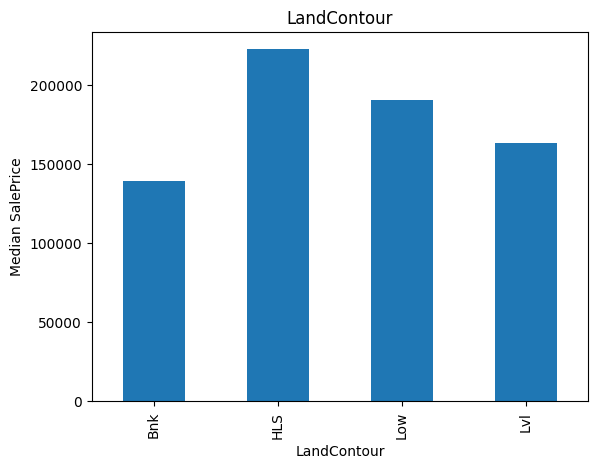

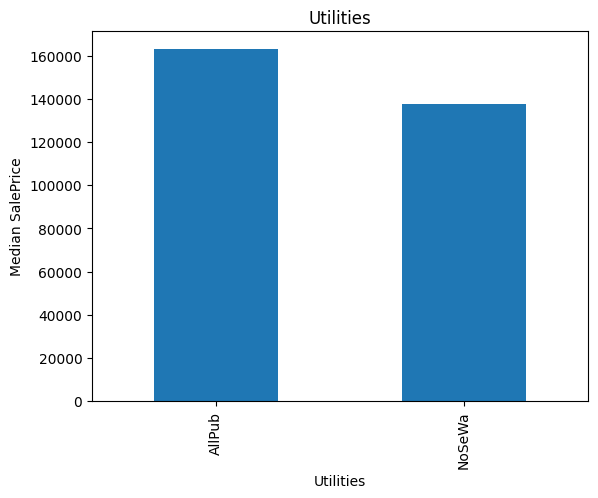

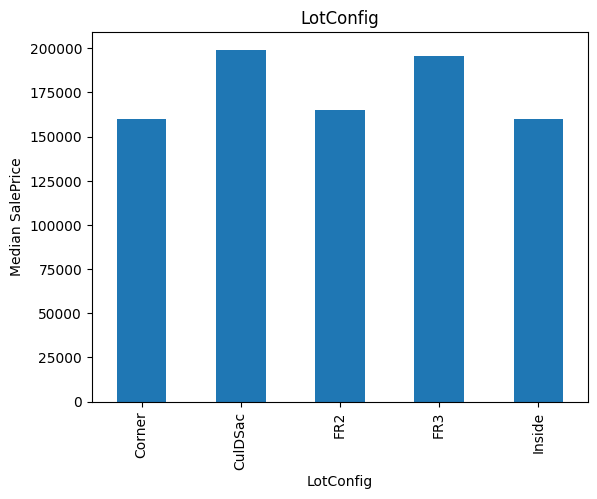

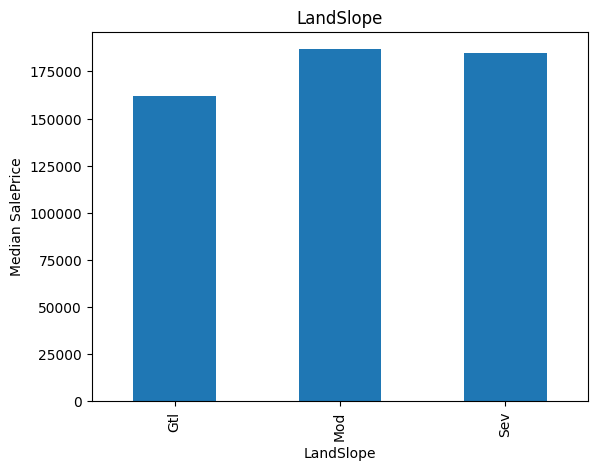

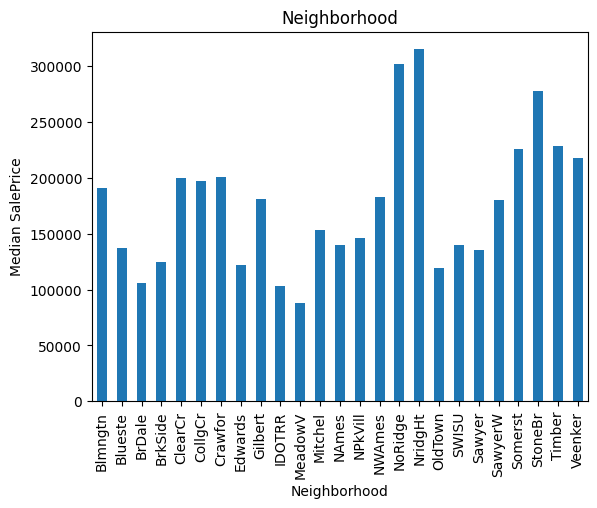

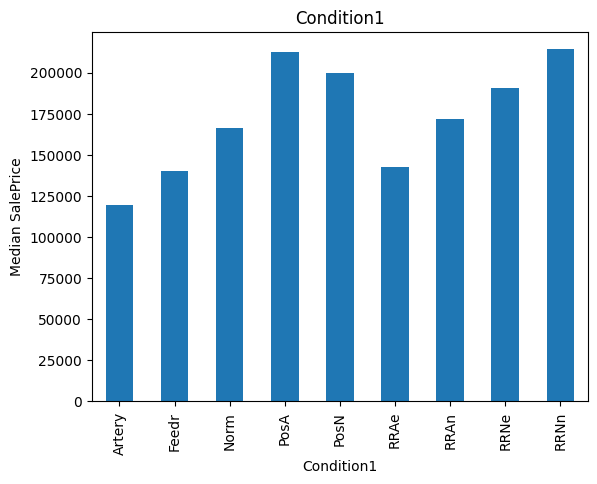

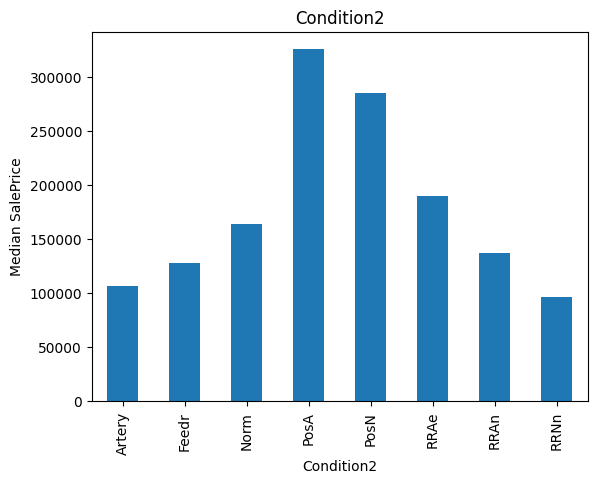

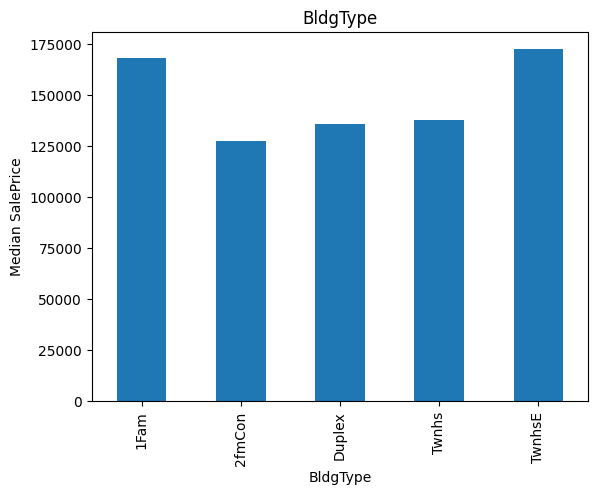

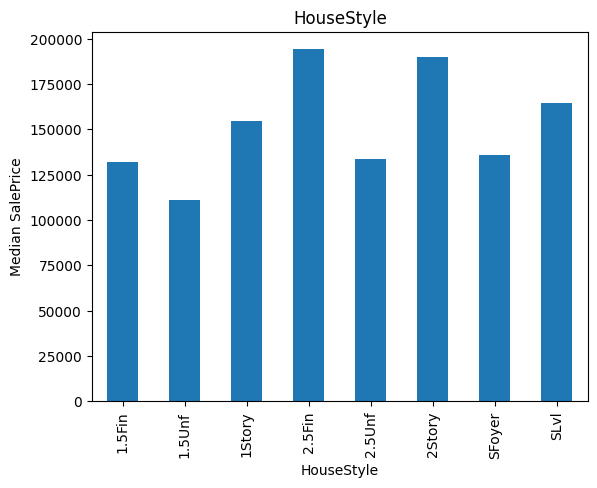

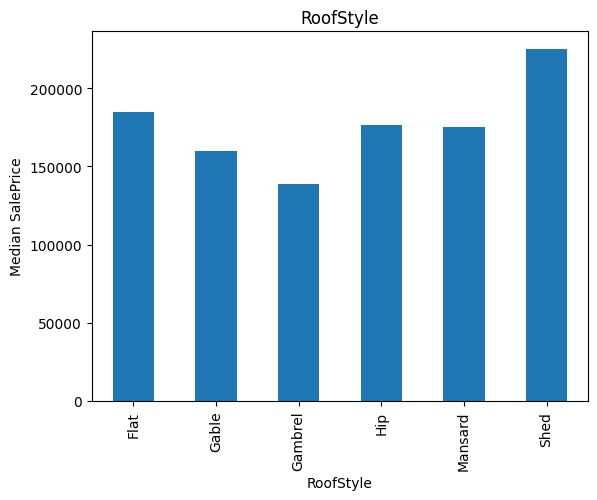

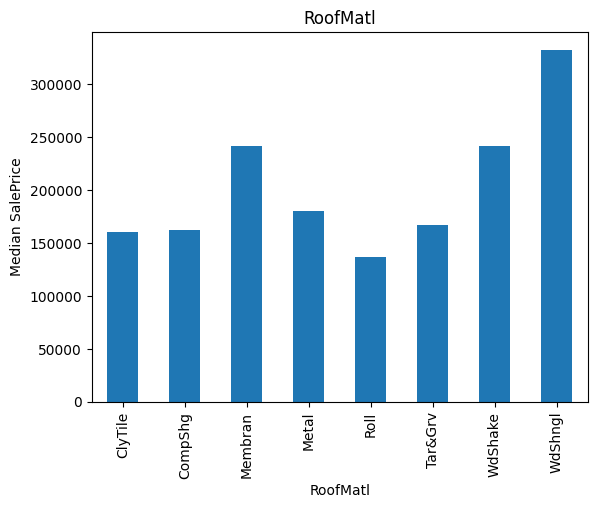

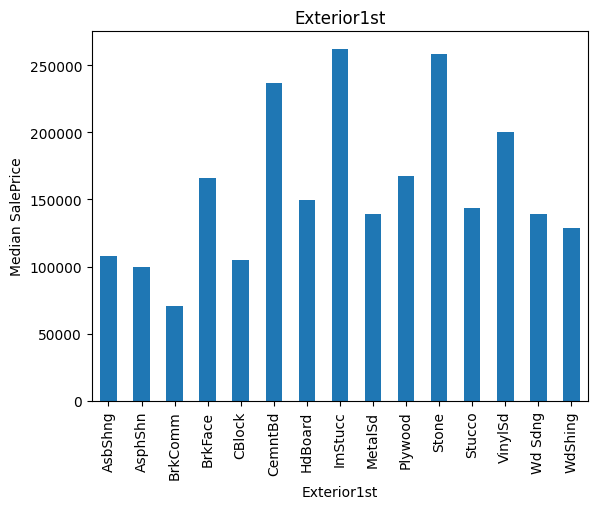

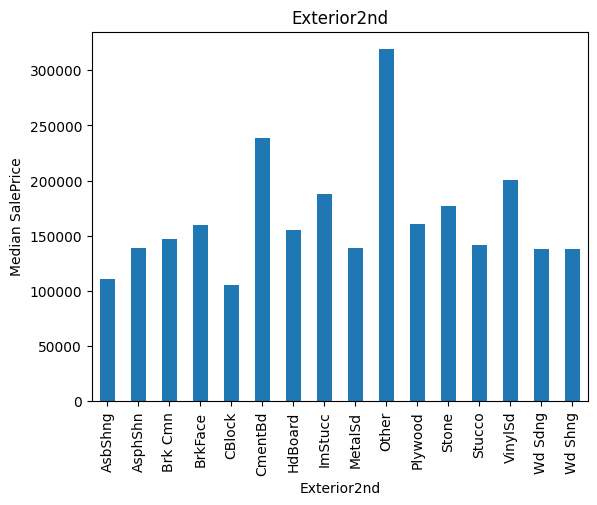

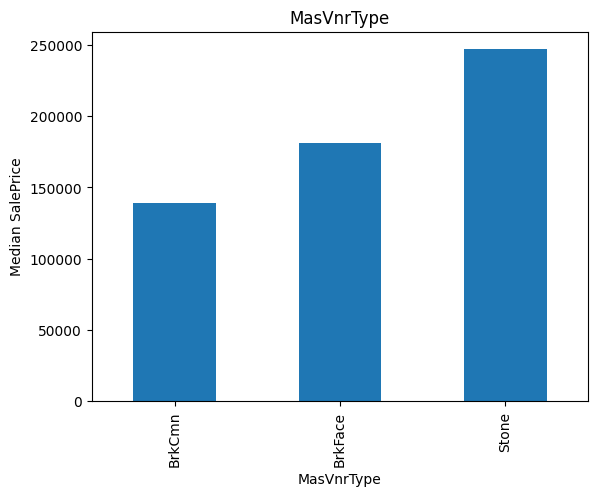

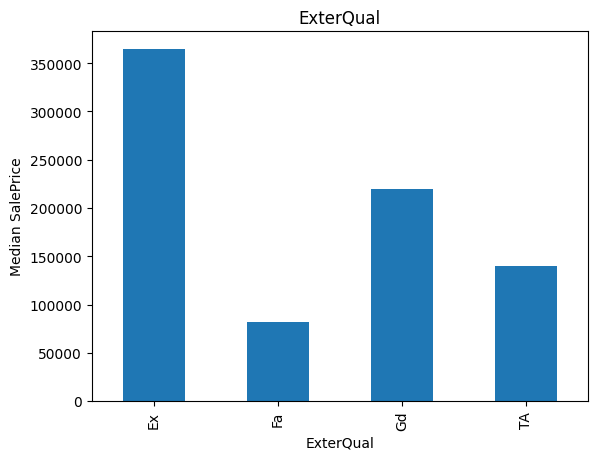

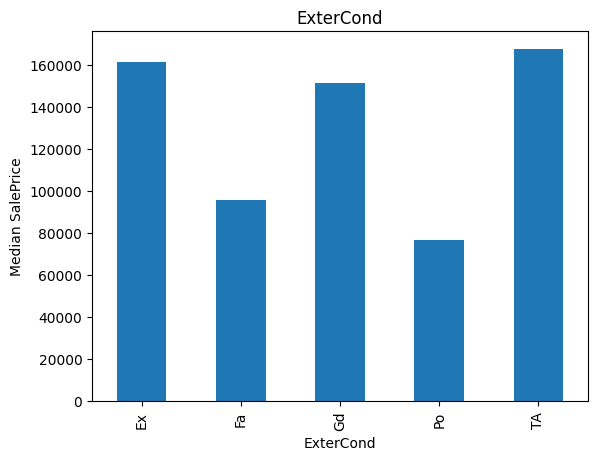

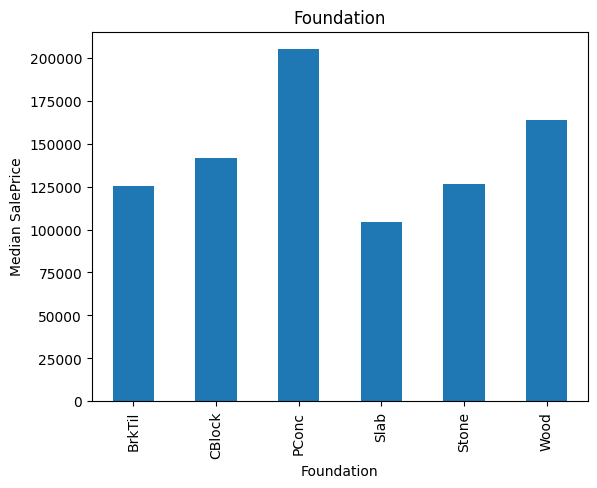

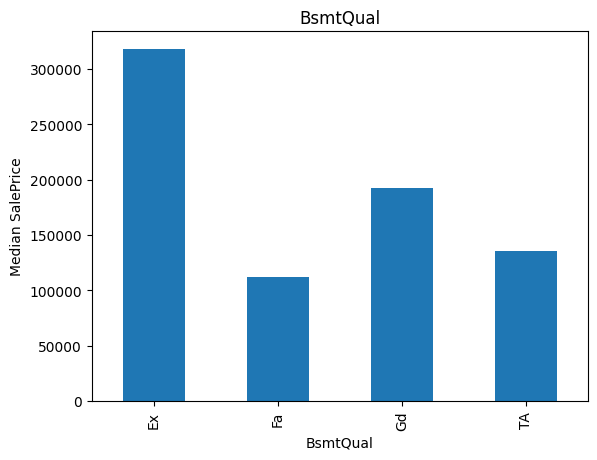

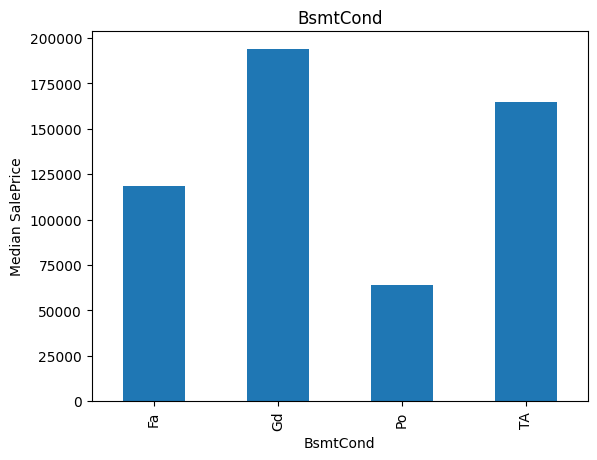

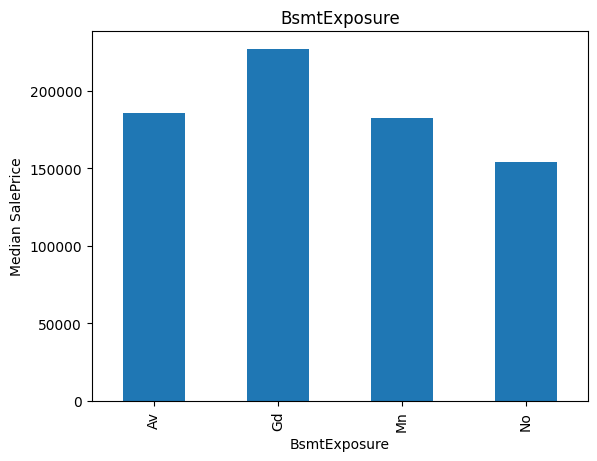

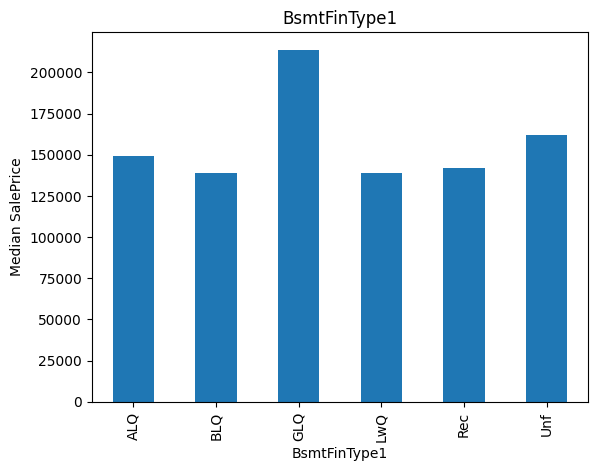

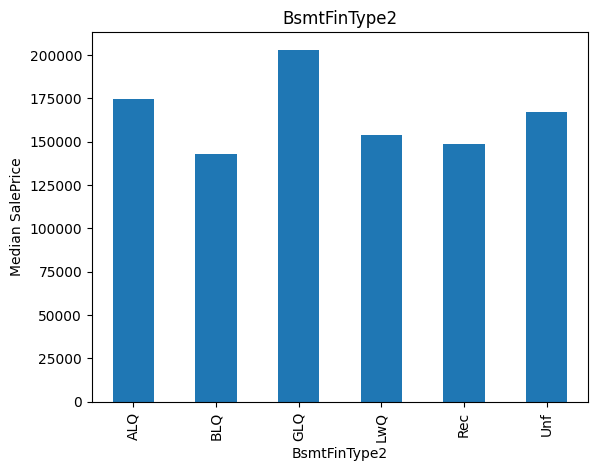

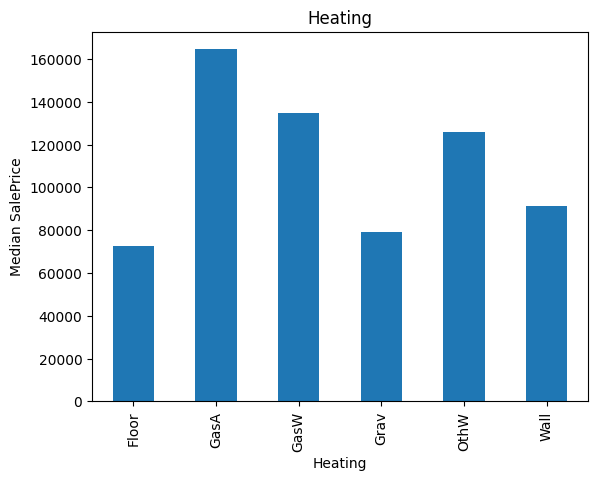

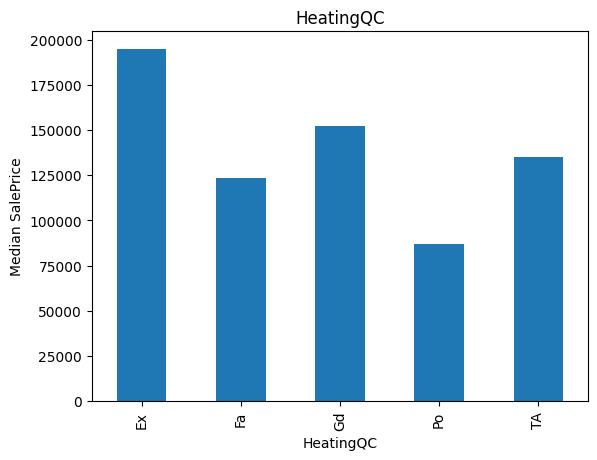

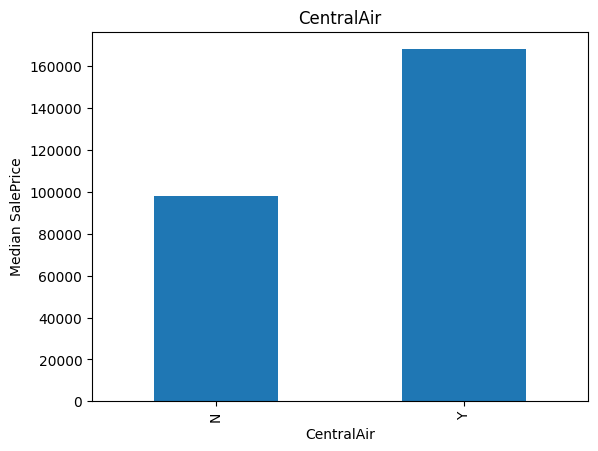

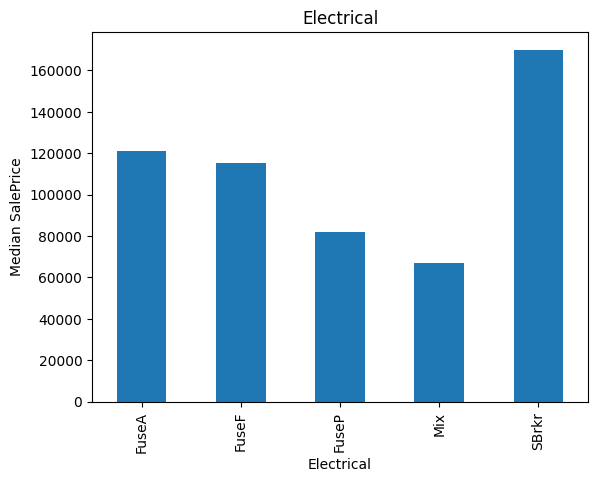

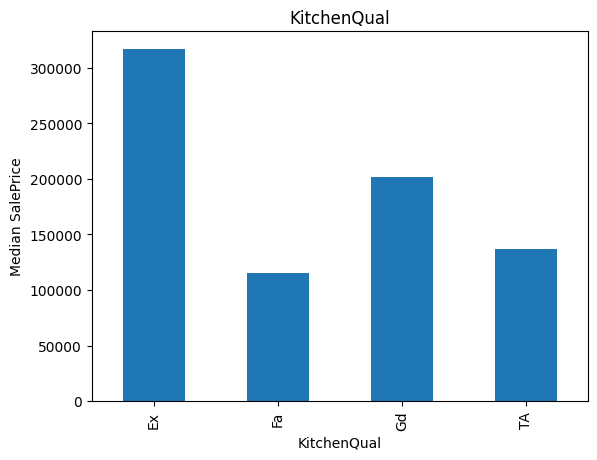

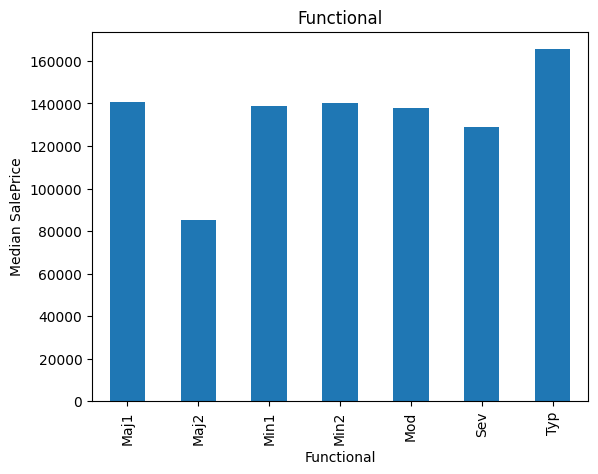

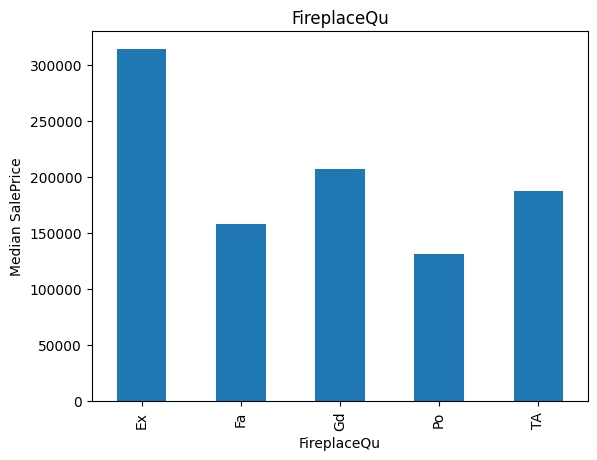

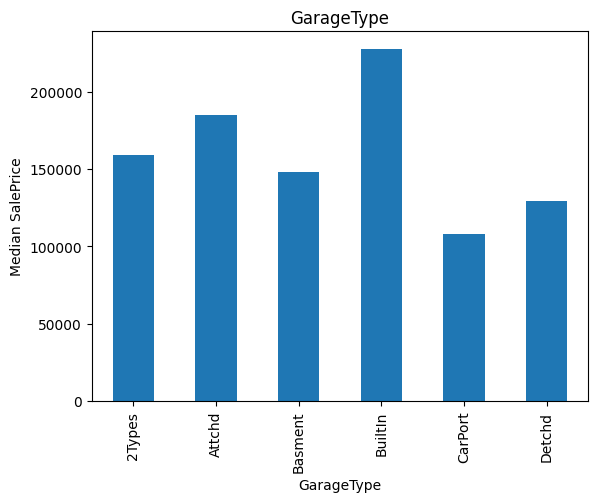

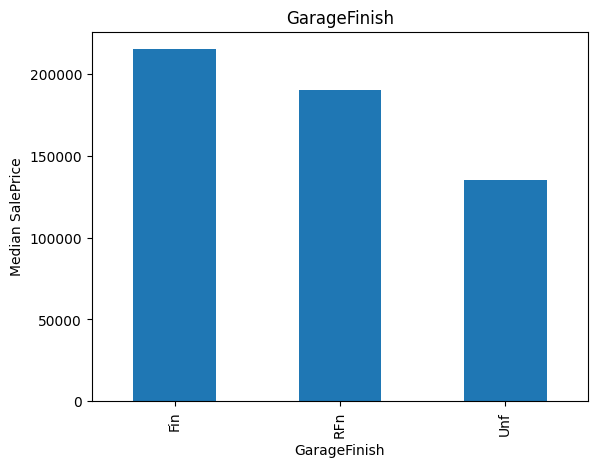

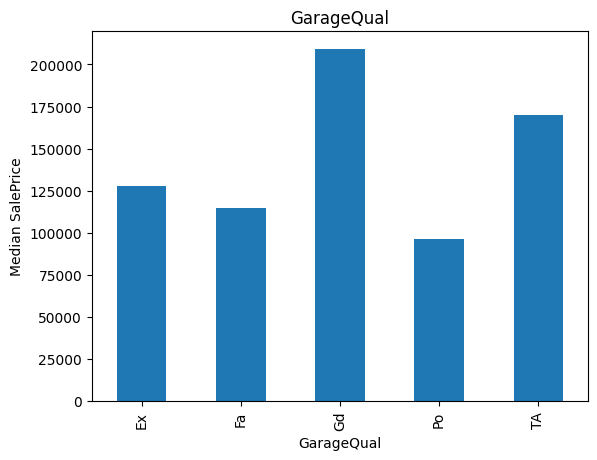

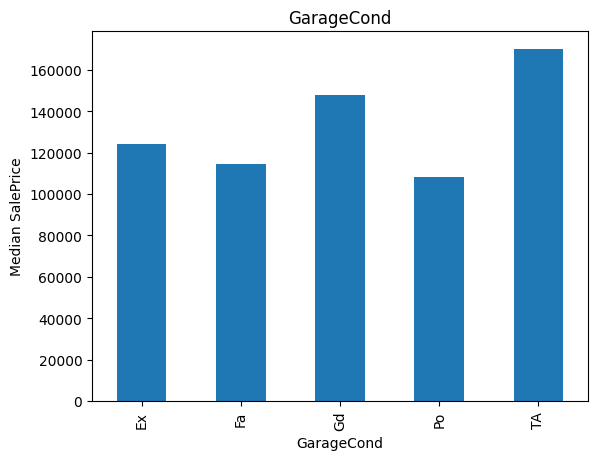

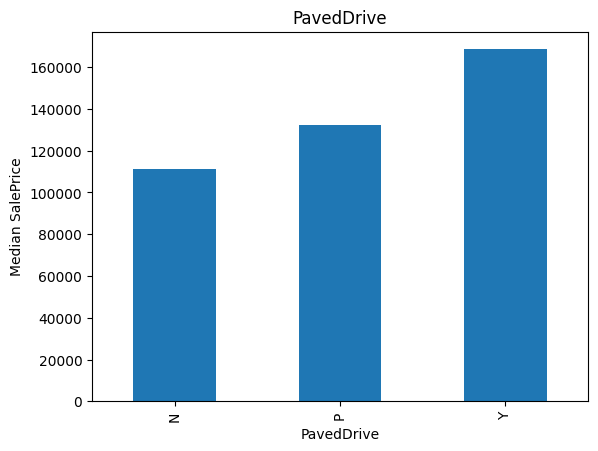

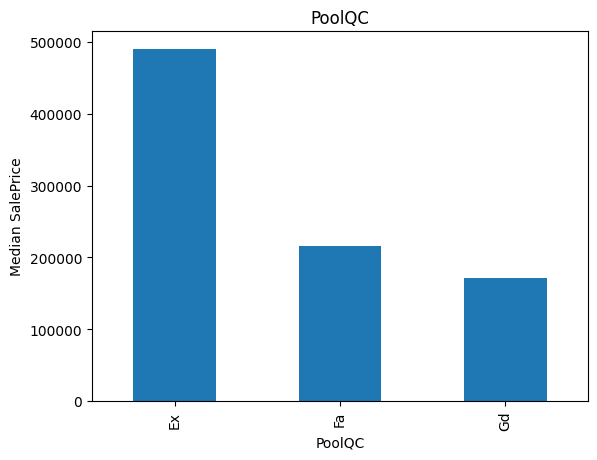

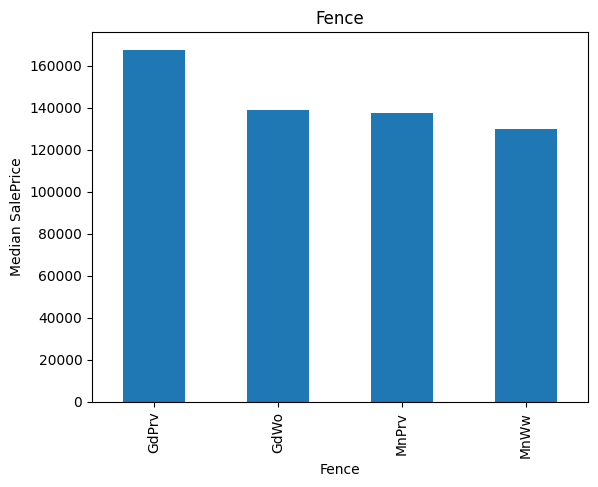

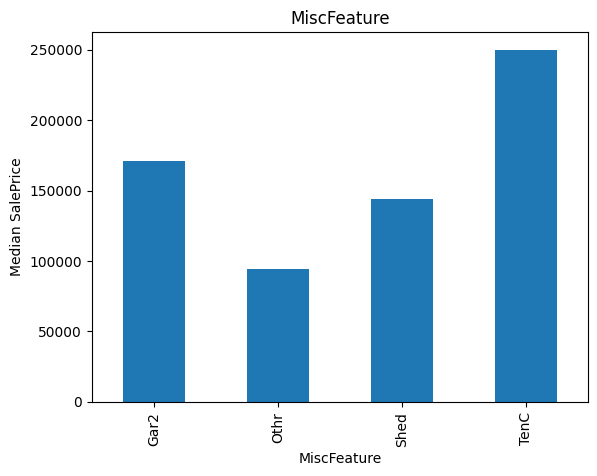

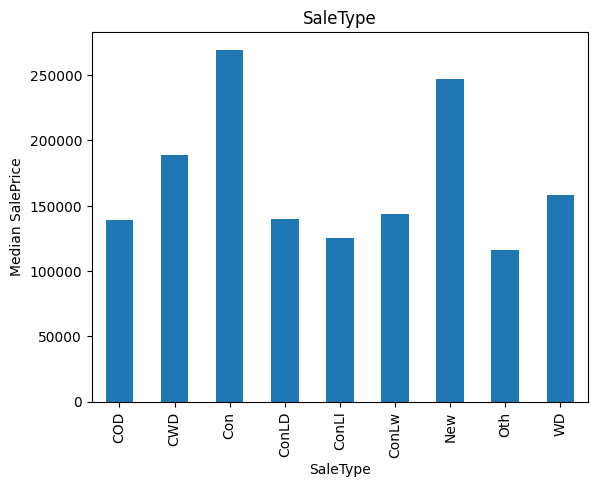

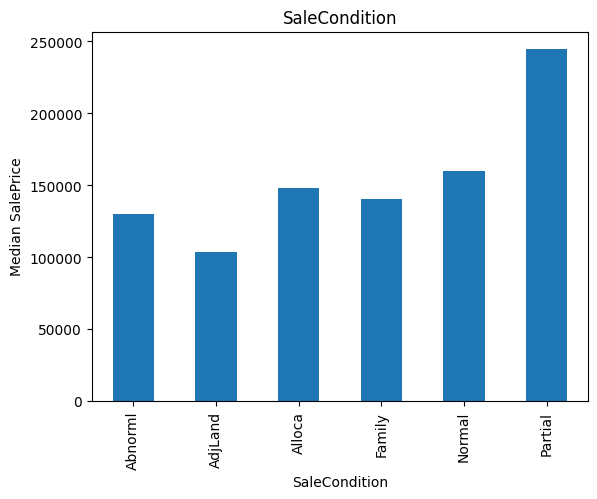

In [49]:
## Find out the relationship between categorical features and SalePrice
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.ylabel('Median SalePrice')
    plt.show()

# FEATURE ENGINEERING

Feature engineering is typically done separately on train and test data to avoid data leakage — meaning the test data accidentally influences the training process as test data should be kept completely unseen during training.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_train = pd.read_csv('data/house_price_prediction/train.csv')
df_test = pd.read_csv('data/house_price_prediction/test.csv')

## Handling Missing Values

### Missing values for categorical values

In [53]:
features_nan = [feature for feature in df_train.columns if df_train[feature].isnull().sum()>0 and df_train[feature].dtype == 'O']
for feature in features_nan:
    print(feature, np.round(df_train[feature].isnull().mean(),4)*100, '% missing values')

Alley 93.77 % missing values
MasVnrType 59.730000000000004 % missing values
BsmtQual 2.53 % missing values
BsmtCond 2.53 % missing values
BsmtExposure 2.6 % missing values
BsmtFinType1 2.53 % missing values
BsmtFinType2 2.6 % missing values
Electrical 0.06999999999999999 % missing values
FireplaceQu 47.260000000000005 % missing values
GarageType 5.55 % missing values
GarageFinish 5.55 % missing values
GarageQual 5.55 % missing values
GarageCond 5.55 % missing values
PoolQC 99.52 % missing values
Fence 80.75 % missing values
MiscFeature 96.3 % missing values


In [ ]:
## Replace missing values in categorical features with 'Missing'
for feature in features_nan:
    df_train[feature] = df_train[feature].fillna('Missing')